In [1]:
#import scvi
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os


# AA

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig6"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(6,6))


In [3]:
AA_genes = [
    "CCDC88B",
    "VAMP1",
    "CD27",
    "CTLA4",
    "ICOS",
    "CD28",
    "EMSY",
    "IL21",
    "IRF4",
    "DNAJC4",
    "RPS6KA4",
    "DUSP22",
    "GPR137",
    "FERMT3",
    "FPR3",
    "PLCB3",
    "VEGFB",
    "PA2G4",
    "PPP1R14B",
    "VEGFB",
    #"PA2GF",
    "PPP1R14B",
    #"PRDM15",
    "MACROD1",
    "ERBB3",
    "ORMDL2",
    "FOXE1",
    "EGR2",
    "ADO",
    "TRPT1",
    "HAS1",
    "PLEKHH2",
    "DYNC2LI1",
    "DEXI",
]

# sc.pl.DotPlot(
#         adata[adata.obs["Mapping_status2"]!="Atlas"],
#        AA_genes,
#         #swap_axes=True,
#         groupby="provisional2",
#        vmax=1,
#         #    colorbar_title='Mean expression\n(variance scaled)', 
#         standard_scale="var",
#     ) \
#         .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
#                    dot_max=1

#               )\
#     .show()


# cell types

In [4]:
BASE_DIR ='/nfs/team298/ls34/new_disease_atlas/model_scanvi5_AAv1_5985/'
os.listdir(BASE_DIR)

#adata_ii=sc.read_h5ad(BASE_DIR+'adata_AA.h5ad')
adata_ii=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_AA.h5ad')
adata_ii.obs["lvl5_annotation"]=adata_ii.obs["provisional2"]


In [6]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"

PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata=sc.read_h5ad(PATH2)


In [41]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_i.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_i.var_names]
    return LIST


In [58]:
import anndata as ad
adata_i=ad.concat([adata,adata_ii])


/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/anndata/_core/merge.py:1279: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(


In [59]:
adata_i=adata_i[adata_i.obs["Site_status"]=="Lesional"]
adata_i.obs["Patient_status"].value_counts()
#adata_i.=adata_i[adata_i.obs["Patient_status"]"Lesional"]


Patient_status
AD           361514
Psoriasis    206804
AA             9846
Name: count, dtype: int64

In [64]:
adata_i=adata_i[(adata_i.obs["lvl5_annotation"].str.startswith("Treg"))
           #    (adata_i.obs["lvl5_annotation"].str.startswith("TR1"))
               ]
#adata_i=adata_i[adata_i.obs["lvl5_annotation"]!='Treg/Tnaive_prolif']

adata_i.obs["lvl5_annotation"].value_counts()

lvl5_annotation
Treg                  9233
Treg_LRRC32+          7383
Treg/Tnaive_prolif     455
Name: count, dtype: int64

In [61]:
adata_i.obs["Patient_status"].value_counts()


Patient_status
AD           10255
Psoriasis     5308
AA            1559
Name: count, dtype: int64

In [62]:
import pickle

file_path = "/nfs/team298/ls34/color_for_adult_skin2.pkl"

with open(file_path, "rb") as f:
    color_dict = pickle.load(f)

# Inspect first few entries
print(list(color_dict.items())[:10])

[('Adipocyte', '#B8860B'), ('F1: Superficial', '#FFFFE4'), ('F1: Regenerative', '#FFFFE4'), ('F2/3: Perivascular', '#78b5d7'), ('F2: Universal', '#d0e1f2'), ('F3: FRC-like', '#fbd4d7'), ('F4: DS_DPEP1+', '#6A728B'), ('F4: TNN+COCH+', '#bad6ea'), ('F5: NGFR+', '#788bd2'), ('F5: RAMP1+', '#9e99c9')]


/tmp/ipykernel_3573153/3262135145.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Patient_status", "lvl5_annotation"])
/tmp/ipykernel_3573153/3262135145.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby("Patient_status")["count"].transform("sum")


<Figure size 3000x1800 with 0 Axes>

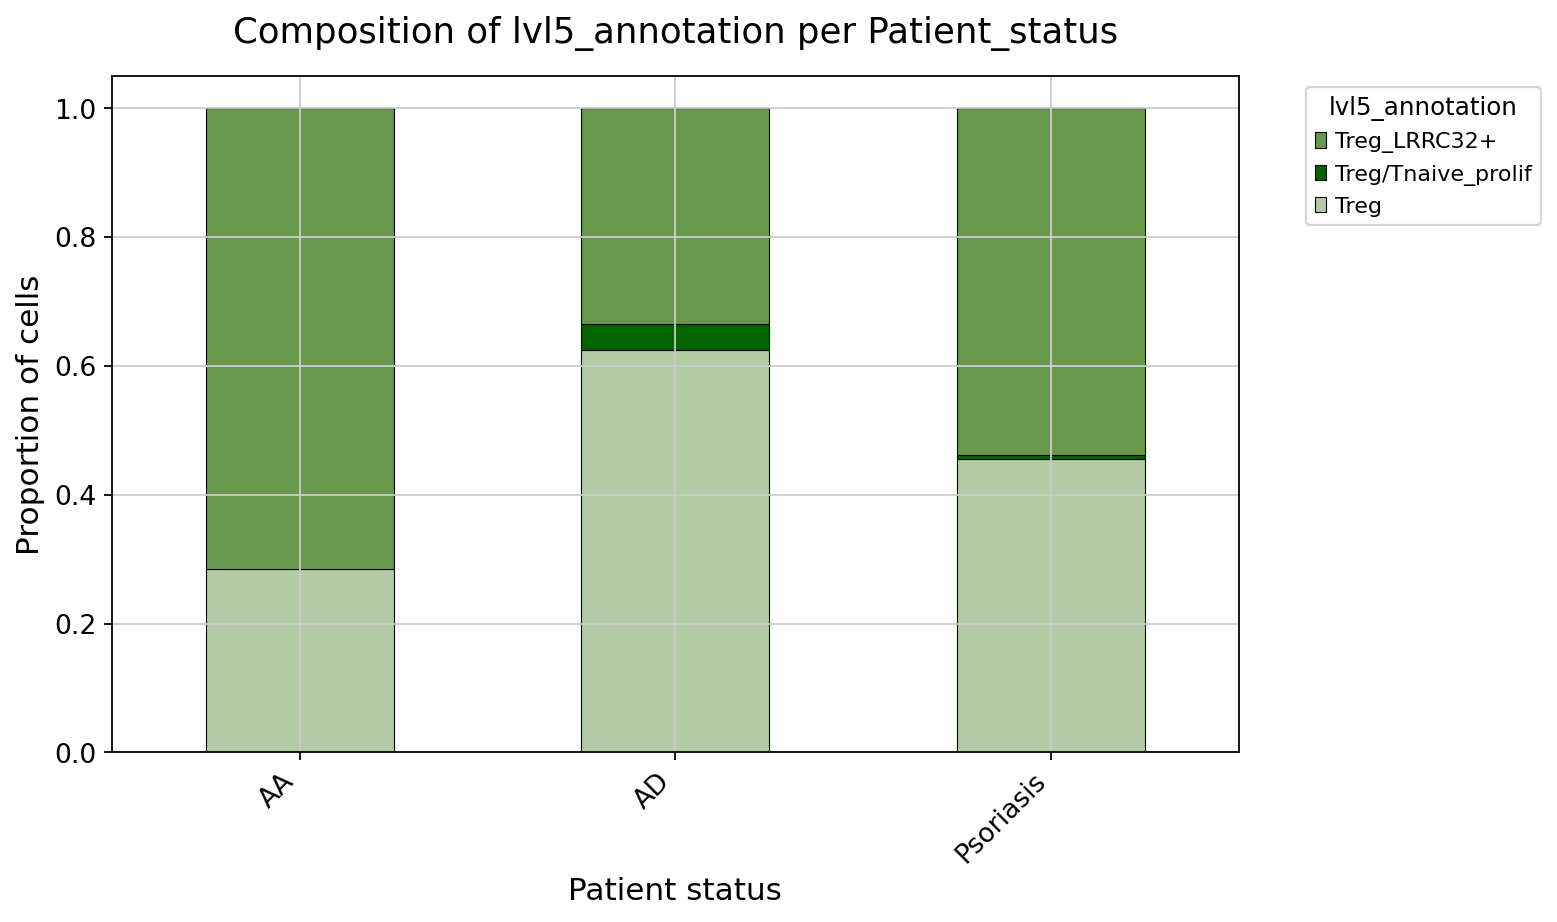

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# --- Load color dictionary ---
file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'
with open(file_path, 'rb') as f:
    color_dict = pickle.load(f)

# --- Compute proportion table ---
counts = (
    adata_i.obs
    .groupby(["Patient_status", "lvl5_annotation"])
    .size()
    .reset_index(name="count")
)

# Compute total per Patient_status
totals = counts.groupby("Patient_status")["count"].transform("sum")

# Compute proportions
counts["proportion"] = counts["count"] / totals

# --- Pivot to wide format for plotting ---
prop_table = counts.pivot(
    index="Patient_status", 
    columns="lvl5_annotation", 
    values="proportion"
).fillna(0)

# Sort by total cells (optional)
prop_table = prop_table.loc[prop_table.sum(axis=1).sort_values(ascending=False).index]

# --- Prepare consistent color order ---
# Ensure colors are in the same order as columns
color_list = [color_dict.get(col, "lightgrey") for col in prop_table.columns]

# --- Plot ---
plt.figure(figsize=(10, 6), dpi=300)

ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=color_list,       # use custom colors
    edgecolor="black",
    linewidth=0.5
)

plt.ylabel("Proportion of cells", fontsize=14)
plt.xlabel("Patient status", fontsize=14)
plt.title("Composition of lvl5_annotation per Patient_status", fontsize=16, pad=15)

# Legend with proper ordering and custom colors
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles[::-1], labels[::-1],   # reverse legend for top-down stacking
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="lvl5_annotation",
    fontsize=10,
    title_fontsize=11
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: save to file
# plt.savefig("fig3/patientstatus_lvl5annotation_proportions.pdf", bbox_inches="tight", dpi=300)

plt.show()

 

/tmp/ipykernel_3573153/1802379193.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Patient_status", "lvl5_annotation"])
/tmp/ipykernel_3573153/1802379193.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby("Patient_status")["count"].transform("sum")


<Figure size 1500x1500 with 0 Axes>

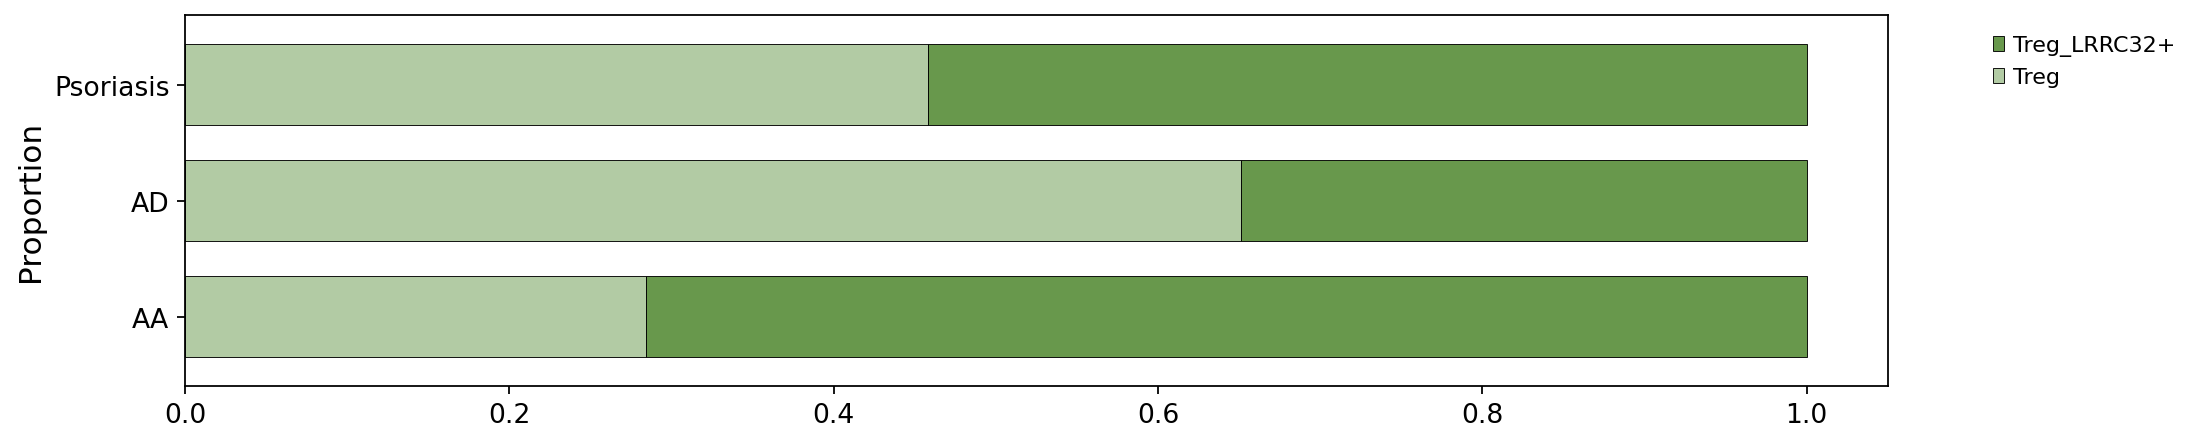

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# --- Load color dictionary ---
file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'
with open(file_path, 'rb') as f:
    color_dict = pickle.load(f)

# --- Compute proportion table ---
counts = (
    adata_i.obs
    .groupby(["Patient_status", "lvl5_annotation"])
    .size()
    .reset_index(name="count")
)

# Compute total per Patient_status
totals = counts.groupby("Patient_status")["count"].transform("sum")

# Compute proportions
counts["proportion"] = counts["count"] / totals

# --- Pivot to wide format for plotting ---
prop_table = counts.pivot(
    index="Patient_status", 
    columns="lvl5_annotation", 
    values="proportion"
).fillna(0)

# Sort by total cells (optional)
prop_table = prop_table.loc[prop_table.sum(axis=1).sort_values(ascending=False).index]

# --- Prepare consistent color order ---
color_list = [color_dict.get(col, "lightgrey") for col in prop_table.columns]

# --- Plot ---
plt.figure(figsize=(5, 5), dpi=300)

ax = prop_table.plot(
    kind="barh",                # horizontal bars
    stacked=True,
    figsize=(14, 3),
    color=color_list,
    edgecolor="black",
    linewidth=0.4,              # thinner bars
    width=0.7                   # slightly thinner overall bars
)

# --- Aesthetic tweaks ---
ax.set_facecolor("white")       # white background
plt.grid(False)                 # 1. remove background grid

# 2. remove box around legend
legend = plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=False,              # no box
    title="lvl5_annotation",
    fontsize=10,
    title_fontsize=11
)
handles, labels = ax.get_legend_handles_labels()
legend.remove()                 # remove old legend first
plt.legend(
    handles[::-1], labels[::-1],
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=False,
    title="",
    fontsize=10,
    title_fontsize=11
)

# 3. remove title
plt.title("")

# 4. remove xlabel
plt.xlabel("")

# 5. change ylabel
plt.ylabel("Proportion", fontsize=14)

# --- Axis styling ---
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: save to file
# plt.savefig("fig3/patientstatus_lvl5annotation_proportions_horizontal.pdf", bbox_inches="tight", dpi=300)

plt.show()

In [66]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



In [70]:
ALL_T = {#'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
 # 'CMSS1',
  'LAYN',
  'CCR8',
  'NR4A1'],
#  'TR1': ['EOMES',
#   'IL10',
#   'LAG3',
#   'HAVCR2',
#   'PDCD1',
#   'FOXB1',
#   'TNFSF9',
#  # 'VCAM1'
#         ],
  
 #'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
#  'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
#  'Th': ['CD4', 'CD40LG', 'MCAM', ],
#  'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1',
#          'XYLT1', 'GNAQ',  'ZEB2', # 'PTGS2', 'MMP7',
#         "ZHX2",'CCR6', 'BACH2', "CXCR6",
#                ],
#          #"CD8": ["CD8A"],
        
                
#  'CD8A+ cytotoxic T cells': [ 'GZMA', 'GZMK', 'CCL4','NKG7', 'CCL5',  ],
#            'Tc0': ['DONSON', 'GPR15', 'CD8B2', 'IL9R', 
#                      #"AGAP1", "C12orf42", "GML", "CCR5",
#                      ],

#          'IFNG': ["KLRG1",'IFNG', 'TNFSF9', 'CCL3'],
#  'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
#  'TRM_IL13': ['IL22', 'IL13', 'NBAS',# 'CCL17',
#          'AREG', 'IL9R', 'PDLIM4', 'CCR8',
#          'ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
#  'TRM_IL17': ['IL17A',
#   'IL17F',
#   'CXCL13',
#   'CCL20',
#   'IL23R',
#   'RORC',
#   'ADAM12',  'LRRN3',
#   'MYO7A',
#   'IL21',],
#     'Mixed': [

#   'CTSH',
#   'VDR',
#   'CCR6',
#   'IL26'
#          ],
#  'Other': ['PTPN13', #'ITGA1'
#           ],
#  'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
#  #'Memory': ['CD69'],
#  'Gamma-delta': ['FXYD2',
#   'TRGC2',
#   'TRDV1',
#   'TRGV4',
#   'EMP1',
#   'NSG1',
#   'MPZL2',
#   'XCL1',
#   'KLRC2',
#   'KLRC3',
#   'KLRD1',
#   'TRDC',
#   'VSTM2L',
#   'LAT2',
#   'SPINT2',
#   'KRT86',
#   'FCER1G',
#   'TRDV1',
#   'SPRY2'],
#  'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
#      'TYROBP',],
#  #'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
#                  'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
#  # 'ILC2_inflammatory': ['CRLF2',
#  #  'IL17RB',
#  #  'IL1RL1',
#  #  'IL18R1',
#  #  'PLA2G4A',
#  #  'IL4',
#  #  'IL31',
#  #  'ICOS',
#  #  'NRROS'],

        }
ORDER = ['Treg_AA',
 'Treg_AD', 'Treg_Psoriasis',
 'Treg_LRRC32+_AA',
 'Treg_LRRC32+_AD',
 'Treg_LRRC32+_Psoriasis',
]
adata_i=adata_i[adata_i.obs["lvl5_annotation"]!='Treg/Tnaive_prolif']
adata_i.obs["t"]=adata_i.obs["lvl5_annotation"].astype(str)+"_"+adata_i.obs["Patient_status"].astype(str)

# Count how many cells per category
counts = adata_i.obs["t"].value_counts()

# Keep only categories with at least 50 cells
valid_categories = counts[counts >= 50].index

# Filter AnnData
adata_i = adata_i[adata_i.obs["t"].isin(valid_categories)].copy()

# If "t" is categorical, clean unused levels
if pd.api.types.is_categorical_dtype(adata_i.obs["t"]):
    adata_i.obs["t"] = adata_i.obs["t"].cat.remove_unused_categories()

print("Remaining categories:", adata_i.obs["t"].unique().tolist())


Remaining categories: ['Treg_Psoriasis', 'Treg_LRRC32+_Psoriasis', 'Treg_AD', 'Treg_LRRC32+_AD', 'Treg_LRRC32+_AA', 'Treg_AA']


/tmp/ipykernel_3573153/740606577.py:101: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs["t"]=adata_i.obs["lvl5_annotation"].astype(str)+"_"+adata_i.obs["Patient_status"].astype(str)
/tmp/ipykernel_3573153/740606577.py:113: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata_i.obs["t"]):


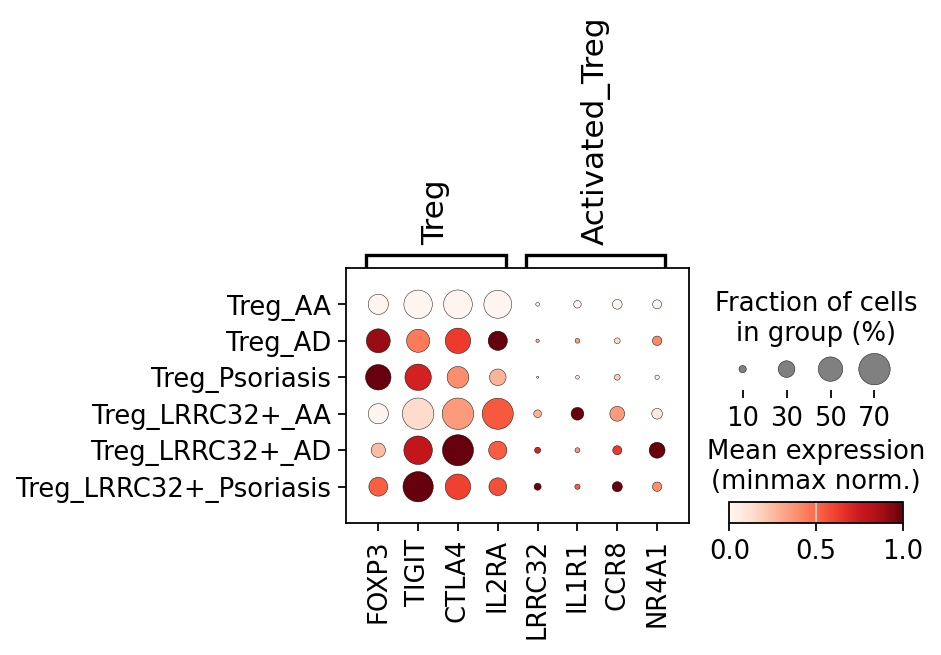

In [71]:
sc.pl.dotplot(adata_i, 
              remove_markers(ALL_T),
              groupby="t",
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
           categories_order = ORDER, #[x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
             # save="T_scrna.pdf",
                           colorbar_title="Mean expression\n(minmax norm.)"

             )

 

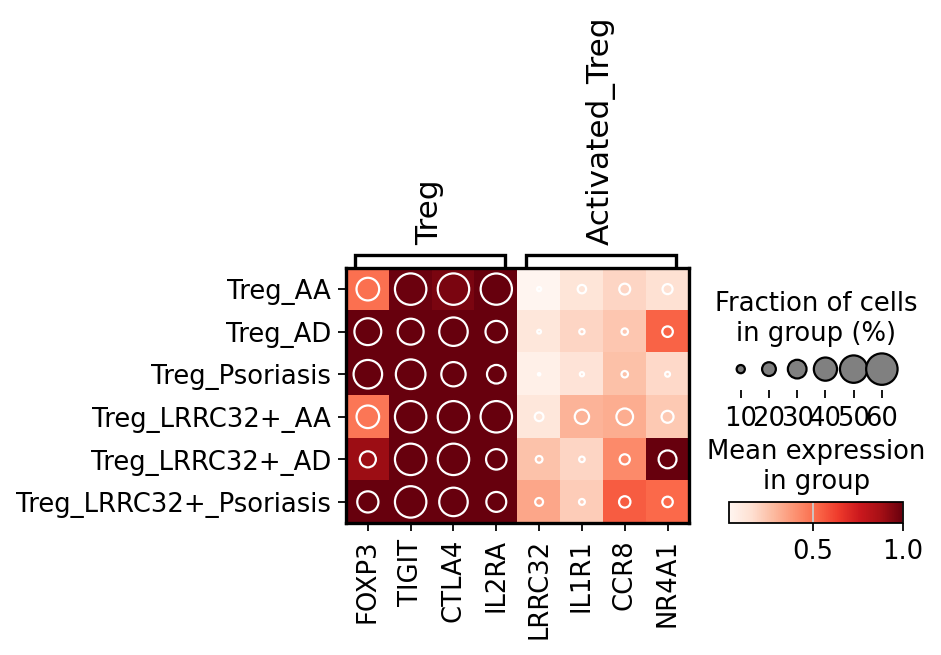

In [80]:
dp =sc.pl.DotPlot(adata_i, 
              remove_markers(ALL_T),
              groupby="t",
                 #standard_scale="var",
            #ot_max=.7,
                      vmax=1,
           categories_order = ORDER, #[x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
             # save="T_scrna.pdf",
                          # colorbar_title="Mean expression\n(minmax norm.)"

             ) 

dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, 
          
               dot_max=.6)  

          
dp.show()   
#dp.savefig("fig6/supp_10a_TREG.pdf", dpi=300)       
    

In [11]:
# KEEP = ["15", "2", "10", ]
# adata_i=adata[adata.obs["leiden_res0.1"].isin(KEEP)]
# adata_ii = adata_i[adata_i.obs["Mapping_status2"]!="Atlas"]

In [12]:
# colors={'Adipocyte': '#B8860B',
#  'F1: Superficial': '#FFFFE4',
#  'F1: Regenerative': '#FFFFE4',

# 'F2/3: Perivascular': '#78b5d7',
#  'F2: Universal': '#d0e1f2',
#  'F3: FRC-like': '#fbd4d7',
#  'F4: DS_DPEP1+': '#d3eec9',
#  'F4: TNN+COCH+': '#80ca80',
#         'F4: DP_HHIP+': "#26a83f",
#          "F4: HF-associated": "#26a83f",
#  'F5: NGFR+': '#788bd2',
#  'F5: RAMP1+': '#9e99c9',
#  'F6: Inflammatory myofibroblast': '#00ffff',
#  'KC1/2': '#505aa1',
#  'KC2/3_cycling': '#007FFF',
#         "KC_cycling":  '#007FFF',
#  'KC3': '#839edd',
#  'KC4': '#b1dae6',
#  'KC5': '#272c5f',
#  'KC_HF: Basal': '#006400',
#          'KC_HF: m': '#abe8bd',
# "KC_HF: HS": '#abe8bd',
        
#  'KC_HF: IRS+HS': '#abe8bd',
#         # 'KC_HF: IRS': '#abe8bd',
#           "KC_SebocyteGland_Outer": "#fe5e00",
#           "KC_SebocyteGland_Inner": "#ffff33",
#         "KC_SebocyteDuct_Outer/HF_Junction": "#5C430F", #"#000000",
#         "KC_SebocyteDuct_Outer": "#958159",
#         "KC_SebocyteDuct_Inner": "#f6d7b0",
#    "KC_HF: ORS0": "#003200",
#        "KC_HF: ORS1": "#9ad295", 
#         "KC_HF: ORS1/2": "#9ad295", 
#         "KC_HF: ORS2": "#e7f9e5",
#          'KC_HF: IRS': "#ff083a",
#         "KC_HF: IRS_cycling": "#FF849D",
        

# # Sweat gland channel inner
# # ILC1/NK
# # Tnaive
# # VE4_Cap_APLN+

        
#  'KC: HF ORS1/2': '#94cb72',
#         "KC_HF: IRS+HS_medulla": "#94cb72",
#         "KC_HF: IRS_TCHH+": "#990523",
#  'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
#  'KCinflamm_basal/int': '#f4e9ef',
#  'KCinflamm_late': '#D49BB1',
#  'LC': '#63D7F0',
# # 'LC_CCR7+': '#5F3D7D',
#  'LC_SLC18A2+': '#3bc1d9',
#  'LE': '#FFFF00',
#  'Mac': '#845DAE',
#          'Mac2': '#845DAE',

#  'Mac2_CCL14hi': '#4F2F6D',
#  'Mast cell':  "#f8ac59",#'#FF1493',
#  'Melanocyte': '#6f3a3a',
#  'MigDC': '#00FF00',
#         'MigDC (cDC2)': '#00FF00',
#         'MigDC (cDC1)':  "#FF073A", #'#00FF00',
#  'Smooth muscle': '#f371af',
#  'Nonspecific': '#D3D3D3',
#  'Pericyte1': '#F7A3C3',
#  'Pericyte2_VSMC': '#D04A8A',
#  'Plasma cell': '#ff5e00',
#  'KC_Sebocyte_basal': '#e28743',
#  'KC_Sebocyte_inner': '#ffd1a3',
#          "KC_Sebocyte": '#ffd1a3',
#  'Sweat gland': '#00CCCC',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
#          'Sweat gland channel inner': "#FFE5B4",#'#D1F9F6',
# # 'Sweat gland channel outer': 'Sweat gland channel outer',
#  'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
#         'Sweat gland channel outer': "#B3FFF0",
#                 "Sweat gland Myoepithelial":  "#f275ae",

#    'T': '#F4D1A1',
#     'T_Prolif': '#D4B082',
#     'Tc': '#8C6A3B',
        
# "Tc1":  '#8C6A3B',
#         'Tc2': '#8C6A3B',
# "Tc_IL9R+GPR15hi": '#5a1f16',
         

         
#     'Tnaive': '#F9F2E4',
#             'Tnaive1': '#F9F2E4',
#             'Tnaive2': '#FCF8F2',

#     'Treg': '#B2CBA4',
#     'Treg_LRRC32+': "#68984c",#'#7E5F43',
#  'VE2': '#9f1a1a',
#          'VE': '#9f1a1a',

#  'VE1_Art': '#660000',
#  'VE3_Ven': '#764869',
#         'VE4_Cap': '#FFB6C1',
#         "VE3_Ven_APLN+": "#FF073A",
        
#  'cDC1':"#ac1d5c", #'#9B70C1',
#  'cDC2': '#6F478C',
#   'cDC2: MMP12hi': "#f71886", #'#7D56A3',
#  'mSchwann': '#A9A9A9',
#  'nmSchwann': '#0A0A0A',
#  'pDC': '#D85B8C',
#         'cDC2: EREG+CCR7+': "#7B8B43",
      




        
        
        
        
# ### scrna only
#         'TransitionalDC': "#9b4ef5",
# 'Bcell': "#e14d00",
# 'Cartilage': "#404040", 
# 'F4: DP_HHIP+': "#26a83f",
#          "F4: HF-associated": "#26a83f",
# 'F6: Inflammatory myofibroblast': "#00ffff",
# 'F_Fascia': "#000000",
# 'ILC1':  "#FF0000",#3"#ffef59",#"#4a7948", #'#3D6B35',
#         "ILC1_NCR2+P2RX7+": "#c7eeb1",#"#FFFF80",
# 'ILC1_NK': "#F4D03F",
#         "ILC1/NK": "#F4D03F",
# 'ILC2':  "#364f99", #"#334ead", #"#F1C40F",
#         'ILC2/3': "#F1C40F",

# 'ILC3': "#FFE1F0",
#         "ILC3 CCL1+PTGDS+":  "#ff69b4", # "#8C6900",
#         "ILC3_CCL1+PTGDS+":  "#ff69b4", # "#c75190",
#         'ILC_Prolif':"#7f3462",
#         "ILC_prolif": "#7f3462",
# 'KC1': "#3a4e7a",
# 'KC2': "#505aa1",
# 'KC_HF: ORS_cycling': "#00b300",
# 'KC_HF: Basal_NPNT+': "#006400",
#          "KC_HF": "#006400",
# 'KCinflamm_basal': "#f9f3fb",
#         'KCinflamm': "#f9f3fb",
#         "KCinflamm_int/late":  "#e9c8dc",

# 'KCinflamm_cycling':"#e0c5d2",
#         "KC1-2_cycling": "#e0c5d2",
# 'KCinflamm_int': "#f5d3e7",
# 'LC_CCR7+': "#3bc1a4",
# 'Mac1': "#6A3F9B",
# 'Mac_CX3CR1+': "#9D1A80",
#         "Mac_TREM2+LPL+":  "#D2C5E1",
# 'Merkel cell': "#2f2f2f",
# 'MoDC': "#7F00A2",
# "MoDC/cDC2: MMP12+": "#7F00A2",
# "MoDC/cDC2": "#7F00A2",
        
# 'Monocyte': "#D8A7FF",
# 'Mono CD16+': "#E1C6FF",
# 'NK': "#FFEB3B",
# 'Neutrophil': "#4D3F8C",
# 'Satellite cell': "#F387C7",
# 'Skeletal muscle': "#F14D8E",
# 'Tc_IFNGhi': "#F5A600",
#         "Tc3_IFNGhi":  "#F5A600",
#         "Tc_GPR15hi": "#FCE4B3",
#             'TRM_IL13+': '#F87A7B',
#         #f98c8d
# 'TRM_IL17+': "#E63238", #"#B25E1F",#F87A7B',#"#A75C3E",
# 'Tc_ZNF683+': "#D4B082",
#         "T_γδ": "#D4B082",
# 'Th': "#F4D1A1",
#         "Th_PPARGhi": "#FAE064",
#                 "Th_PPARGhi_IL17+": "#FD7032",

        
#         "Th_CXCR6+": "#F48B50",
# 'TR1': '#E3F2DC',
# 'cDC2: IL1B+': "#B78FE1",
#         "cDC2_cycling": "#9272B4",
#        "Eosinophil": "#FF5F00",
        
#     "Mechanoreceptor ASIC2+": "#D3D3D3",
        
   
#   "KC_HF/Sebocyte_Junction/inner duct": "#00F7F7", # "#8B4513",  # brown   (saddle-brown)
#     "KC_HF: ORS2/IRS":                     "#FF0000",  # peach   (pale peach)
#         "KC_HF: ORS2i":                     "#FF0000",  # peach   (pale peach)

#     "KC_HF: ORS1? ?bulb/infundibulum":     "#87CEEB",  # neon yellow
#     'KC_HF: ORS-?bulb/infundibulum': "#87CEEB",  
#     "KC_HF: ORS0 (lowq)":                  "#4D4D4D",  # dark grey

#     "KC_HF: ORS0":          "#006400",
#     "KC_HF: ORS1":          "#66C266",
#     "KC_HF: ORS2":          "#FFDDC1",
#     "KC_HF: ORS_cycling":   "#000000",
#     "KC_HF: IRS":           "#0000FF",
#     "KC_HF: IRS0":          "#FFA500",
#     "KC_HF: IRS1":          "#FFFF00",
#     "KC_HF: IRS2":          "#FF69B4",      # "#008000",
#     "KC_HF: IRS_cycling":   "#00F5FF",
#     "KC_HF: HS Xenium":     "#0000FF",
#     "KC_HF: HS":            "#e6ecf0",
#  "KC_HF: HS scRNA":      "#FF69B4",
#     'KC_SebocyteDuct_Outer':   "#FF69B4",
#     #e6ecf0
#       "KC_HF: ORS_junction2inner": "#32CD32",
#     "KC_HF: ORS_junction":       "#39FF14",
#     "KC_HF: ORS cycling(new)":   "#1A1A1A",
#     "KC_HF: HFSC":               "#D600FF",
#     "KC_HF: ORS-Bulb/infundibulum": "#F3FFF3",  #"#F3CCD7",
#     "KC_HF: IRS_Cuticle":        "#D8B7FF",
    
#     "KC_Sebocyte_DuctOuter":                 "#000000",  # black
#     "KC_Sebocyte_DuctInner":                 "#C8A165",  # light brown
#     "KC_Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
#     "KC_Sebocyte_GlandInner":                "#FFFFCC",  # yellow
#     "KC_Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
#     'KC_Sebocyte_DuctInner_Junction':   "#FF69B4", 
#    'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
#     "KC_SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
#     "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
#     "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
#         "Other":                "#F3F3F3",

            
#     "Sebocyte_DuctOuter":                 "#000000",  # black
#     "Sebocyte_DuctInner":                 "#C8A165",  # light brown
#     "Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
#     "Sebocyte_GlandInner":                "#FFFFCC",  # yellow
#     "Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
#     'Sebocyte_DuctInner_Junction':   "#FF69B4", 
#             'Sebocyte_DuctInnerJunction':   "#FF69B4", 

#    'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
#     #"SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
#     "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
#     "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
#         "Other":                "#F3F3F3",

#        }





# # # sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))
# # # sc.pl.umap(
# # #     adata,
# # #     color=[ "lvl5_annotation"],
# # #     show=True,
# # #     frameon=False,
# # #     legend_loc= "on data",
# # #     legend_fontsize=8,
# # #     s=10,
# # #     title='',
# # #     legend_fontoutline=2,
# # #   save="1b_scrna2.pdf"
# # # )
# # sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor="white", frameon=False, figsize=(21,21))
# # # sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))

# # # sc.pl.umap(
# # #     adata,
# # #     color=[ "lvl4_annotation"],
# # #     show=True,
# # #     frameon=False,
# # #     legend_loc= "on data",
# # #     legend_fontsize=12,
# # #     s=10,
# # #     title='',
# # #     legend_fontoutline=2,
# # #   save="1b_scrna.pdf"
# # # )

# # import pickle
# # file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# # # Save the dictionary} to the file
# # with open(file_path, 'wb') as file:
# #     pickle.dump(colors, file)
# adata_ii.obs['provisional2'] =adata_ii.obs['provisional2'] .astype('category')
# adata_ii.uns['provisional2_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_ii.obs['provisional2'].cat.categories]

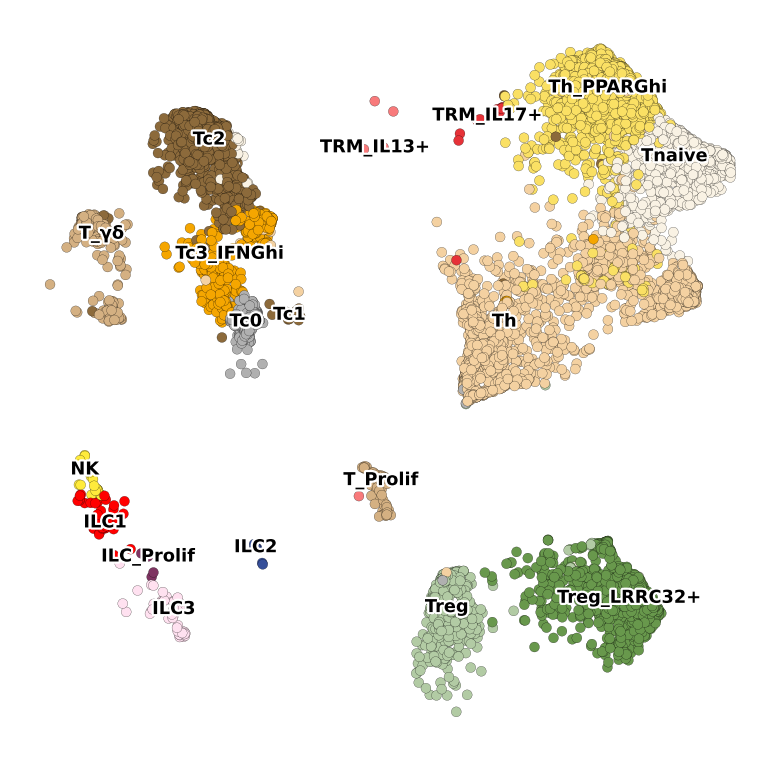

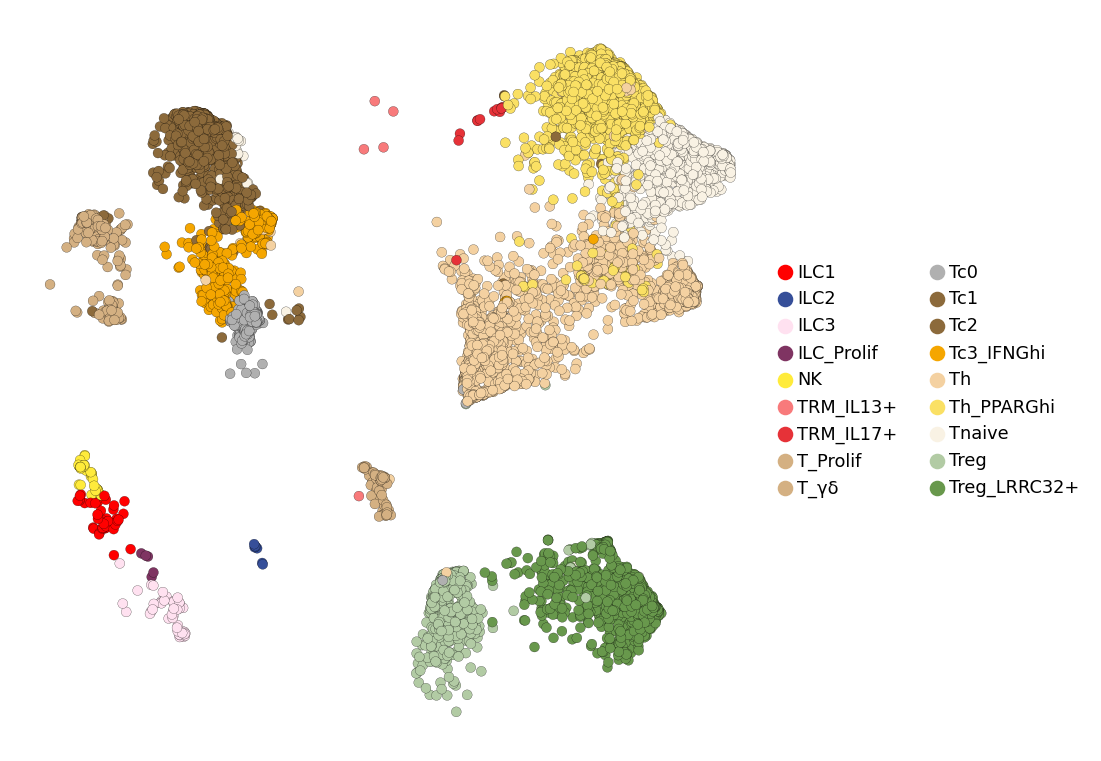

In [13]:

sc.pl.umap(
adata_ii,
    color=[
    'provisional2',
],
legend_loc="on data",
s=80,
    legend_fontsize=8,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    title=''
#legend_fontsize=10)
) 

#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))

sc.pl.umap(
adata_ii,
    color=[
    'provisional2',
],
#legend_loc="on data",
s=80,
    legend_fontsize=8,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    title='',
    save="6b_AA.pdf"
#legend_fontsize=10)
) 



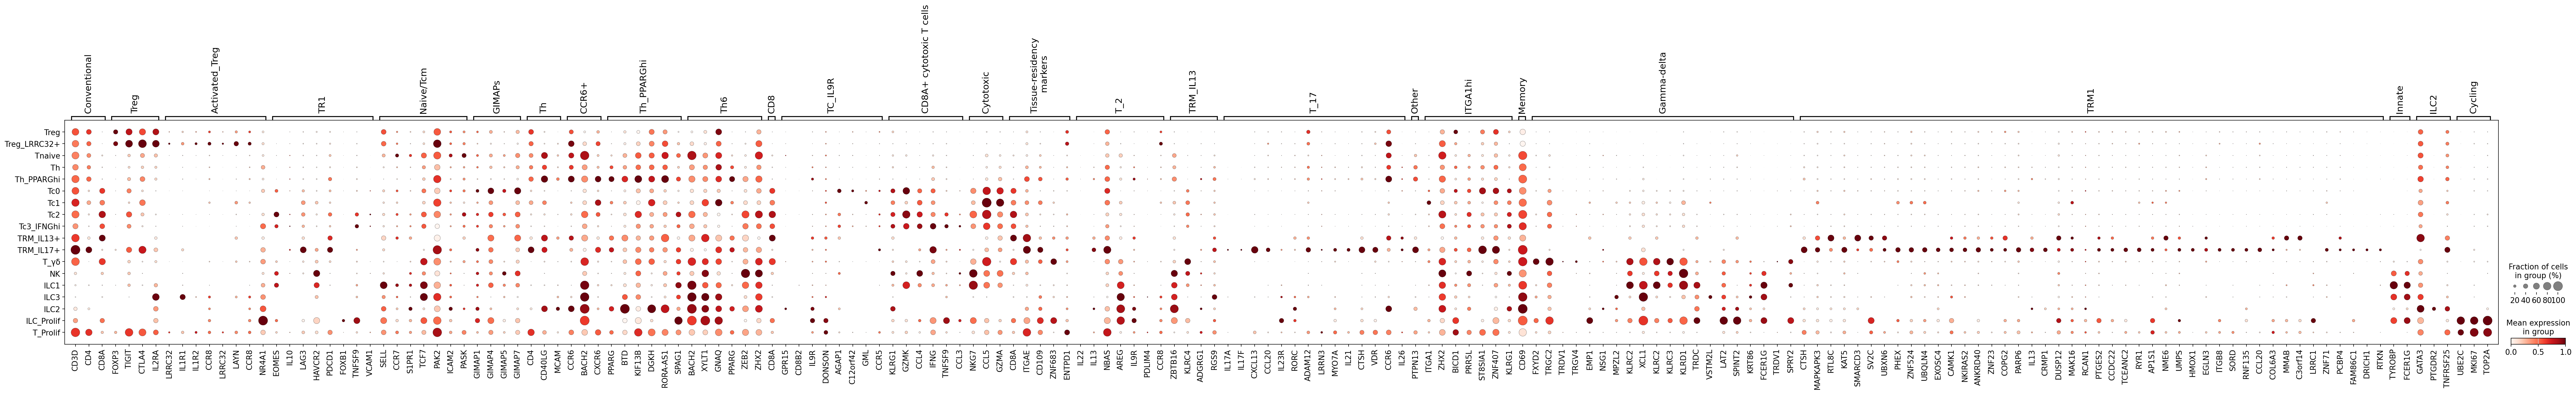

In [14]:
ORDER = [   'Treg',
 'Treg_LRRC32+',
       'Tnaive',
         'Th',
 'Th1?',
 'Th1?junk',
 'Th??',
 'Th_PPARGhi',
 #'Thcentre',
    


'Tc0',
 'Tc0_GPR15hi',
 'Tc1',
 'Tc2',
 'Tc3_IFNGhi',
         'TRM_IL13+',
   'TRM_IL13+1',
 'TRM_IL13+2',
 'TRM_IL17+',
 'T_γδ',

 'NK',
'ILC1',
 'ILC3',
 'ILC3_CCL1+PTGDS+',
     'ILC2',
 'ILC_Prolif',
    
 'T_Prolif',
  
    
]
ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
  'CCR8',
 # 'CMSS1',
  'LRRC32',
  'LAYN',
  'CCR8',
  'NR4A1'],
 'TR1': ['EOMES',
  'IL10',
  'LAG3',
  'HAVCR2',
  'PDCD1',
  'FOXB1',
  'TNFSF9',
  'VCAM1'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
 'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
 'Th': ['CD4', 'CD40LG', 'MCAM', ],
         "CCR6+": ['CCR6', 'BACH2', "CXCR6"],
 'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1'],
 'Th6': ['BACH2', 'XYLT1', 'GNAQ', 'PPARG',  'ZEB2', # 'PTGS2', 'MMP7',
        "ZHX2"],
         "CD8": ["CD8A"],
          'TC_IL9R': ['GPR15', 'CD8B2', 'IL9R', 'DONSON',
                     "AGAP1", "C12orf42", "GML", "CCR5",
                     ],

 'CD8A+ cytotoxic T cells': ["KLRG1", 'GZMK', 'CCL4', 'IFNG', 'TNFSF9', 'CCL3'],
         
 'Cytotoxic': ['NKG7', 'CCL5', 'GZMA'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'T_2': ['IL22', 'IL13', 'NBAS',# 'CCL17',
         'AREG', 'IL9R', 'PDLIM4', 'CCR8'],
 'TRM_IL13': ['ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
 'T_17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',
  'LRRN3',
  'MYO7A',
  'IL21',
  'CTSH',
  'VDR',
  'CCR6',
  'IL26'],
 'Other': ['PTPN13', #'ITGA1'
          ],
 'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
 'Memory': ['CD69'],
 'Gamma-delta': ['FXYD2',
  'TRGC2',
  'TRDV1',
  'TRGV4',
  'EMP1',
  'NSG1',
  'MPZL2',
  'KLRC2',
  'XCL1',
  'KLRC2',
  'KLRC3',
  'KLRD1',
  'TRDC',
  'VSTM2L',
  'LAT2',
  'SPINT2',
  'KRT86',
  'FCER1G',
  'TRDV1',
  'SPRY2'],
        "TRM1":  ["CTSH", "MAPKAPK3", "RTL8C", "KAT5", 
        "SMARCD3", "SV2C", "UBXN6", "PHEX", "ZNF524", "UBQLN4", "EXOSC4", "CAMK1", "NKIRAS2", "ANKRD40",
        "ZNF23", "COPG2", "PARP6", "IL13", "CRMP1", "DUSP12", "MAK16", "RCAN1", "PTGES2", "CCDC22", "TCEANC2", "RYR1",
        "AP1S1", "NME6",  "UMPS",
        "HMOX1", "EGLN3", "ITGB8", "SORD", "RNF135", "CCL20", "COL6A3", "MMAB", "C3orf14", "LRRC1",
        "ZNF71", "PCBP4", "FAM86C1", "DRICH1", "RTKN", 
        
        
        
       ],
 'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
     'TYROBP', 'FCER1G'],
 'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
 # 'ILC2_inflammatory': ['CRLF2',
 #  'IL17RB',
 #  'IL1RL1',
 #  'IL18R1',
 #  'PLA2G4A',
 #  'IL4',
 #  'IL31',
 #  'ICOS',
 #  'NRROS'],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A']}
CATEGORY = "provisional2"
sc.pl.dotplot(adata_ii, 
              ALL_T,
              groupby= CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order=[x for x in ORDER if x in adata_ii.obs[CATEGORY].unique()]
             )
 
# sc.pl.dotplot(adata_ii, 
#               ALL_T,
#               groupby= CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#                           categories_order=[x for x in ORDER if x in adata_ii.obs[CATEGORY].unique()]
              
# )


In [15]:
# CATEGORY= "provisional2"
# #f'leiden_res{RES}' #"test

# ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
#               'Treg': ['FOXP3', 'TIGIT', 'CTLA4', ],
#          "Activated_Treg": ["LRRC32", "IL1R1","IL1R2",'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                             #'F5',# "TOX"
#                            #'ZNF331', 'JMY', 'ELL2','NR4A3','NR4A1','BICDL1',

#                            ],
#               'TR1': ['EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1'],
#  'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
#  'Th': ['CD40LG', "MCAM", "CCR6", "BACH2",
#        'PPARG', 'CXCR6', 'SPAG1', 'ZEB2',],
#  'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',"CXCR3",# "MCOLN1"
#                             ],
#          "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],
#          "Tissue-residency\n markers": ["ITGAE",  'ZNF683', "ENTPD1",  "RBPJ", "KLRB1"],
# 'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
#          "NBAS",  'CCL1', "CCL17", "AREG", "CCR8", "CCR10"],
#  'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R","ITGA1", 
#          "CCR6","RORC", 'TNFRSF8', "ADAM12", "IL1R1", "IL12RB2"],
#          #"Memory": ["CD69",],
#               'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
#                              "NSG1", #"LINC02446","CD9", 
#                               "MPZL2", "KLRC2"], #'TRGC2', 
#              "Innate": ["KLRB1", "KIT", "KLRC1", "KLRC2", 'KLRC3', "TYROBP", "FCER1G",],
               
#                "NK": [ "TBX21",#
#                       "NCR1",#'NMUR1', "NMU",
#                       "B3GAT1", 
#                       "PTGDS",
#                       "CX3CR1", # 
#                       "CCL4L2", #
#                     #
#                       "PRSS23", "CD160", #
#                       "KLRF1", "KLRG1","S100B",
                             
#                       #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
#                      # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
#                               ],
#                       "NK+ILC1": ["KLRD1","NCAM1", "PRF1"  #"IL15",
#                                  ],
#    'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
#                #"IL18", 
#                "ADGRG3", #"CXCR3",
#               ],
#                "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" ],

#                "ILC3": ["ID3", #"ZNF683",
#                         "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
#                        ], #'TNF', "CCR8", "CD9"],

#                 "ILC2+3": ["IL9R", "TNFSF11"],
#  'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
#           #"CALCRL", "HPGDS" ,  "S1PR1",
#          ],
#       'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
#                             "IL18R1", "PPARG",
#                             "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
#                             "PLA2G4A", "IL4", "IL31",
#                            "ICOS", "NRROS"
#                            ],
#          "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
#                }

# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata_5k.var_names]
#     return LIST


# # sc.pl.dotplot(adata_i, 
# #               remove_markers(ALL_T),
# #               groupby= f'leiden_res{RES}',
# #               dendrogram=False, 
# #                 standard_scale="var")

# sc.pl.dotplot(adata_ii, 
#               ALL_T,
#               groupby= CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              categories_order=[x for x in ORDER if x in adata_i.obs[CATEGORY].unique()]
#              )
 
# sc.pl.dotplot(adata_ii, 
#               ALL_T,
#               groupby= CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#                           categories_order=[x for x in ORDER if x in adata_ii.obs[CATEGORY].unique()]
              
# )

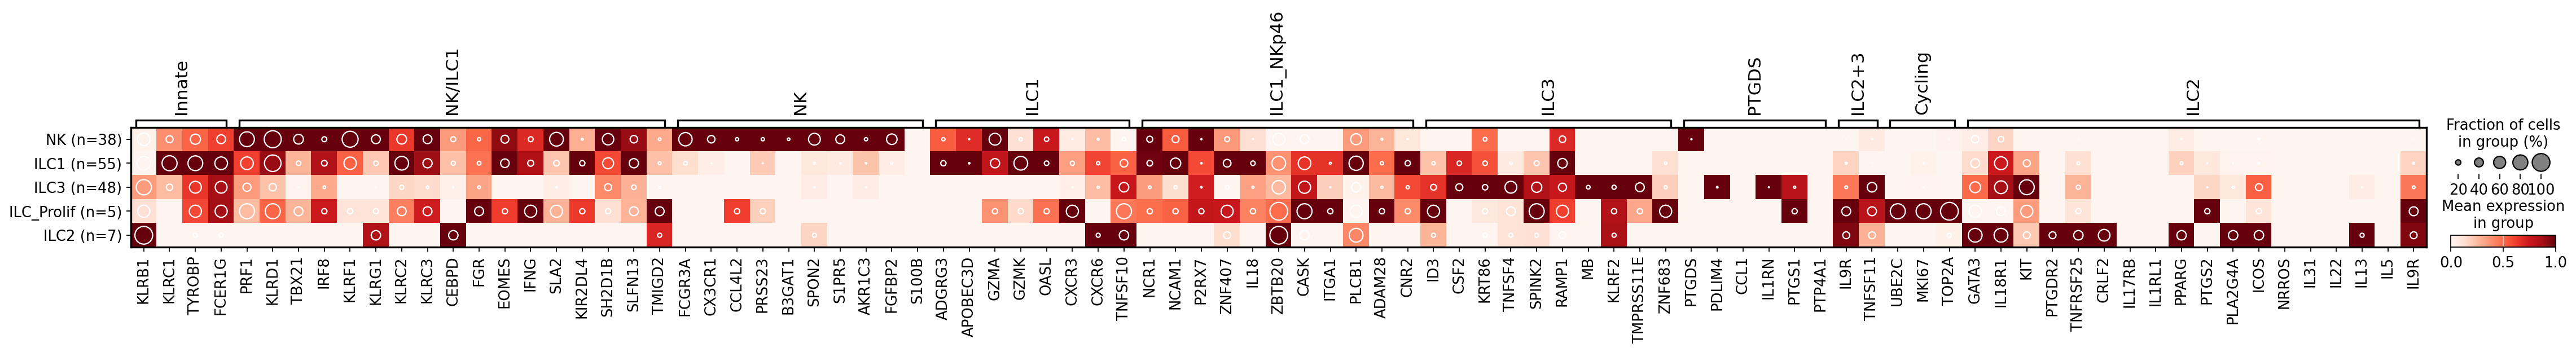

In [16]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", "APOBEC3D", "GZMA", 'GZMK', 'OASL',  "CXCR3", 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  ['NCR1','NCAM1','P2RX7','ZNF407','IL18','ZBTB20','CASK','ITGA1',
 'PLCB1','ADAM28','CNR2'],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1', 'IL1RN', 'PTGS1', 'PTP4A1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
          'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],

 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 # 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
 #        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 #        "RORC+": ["RORC",]
        }

 


             

adata_iiii = adata_ii[adata_ii.obs["provisional"].str.startswith("ILC")]   
    
counts = adata_iiii.obs[CATEGORY].value_counts()
valid_statuses = counts[counts >= 1].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs[CATEGORY].isin(valid_statuses)].copy()
# Step 1: Count cells per group
counts = adata_iiii.obs[CATEGORY].value_counts()
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs[CATEGORY].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]

ORDER=['NK (n=38)', 'ILC1 (n=55)', 'ILC3 (n=48)', 'ILC_Prolif (n=5)', 'ILC2 (n=7)']

sc.pl.DotPlot(
    adata_iiii,  
       ALLT2,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=ORDER,  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1,   

          )\
.show()



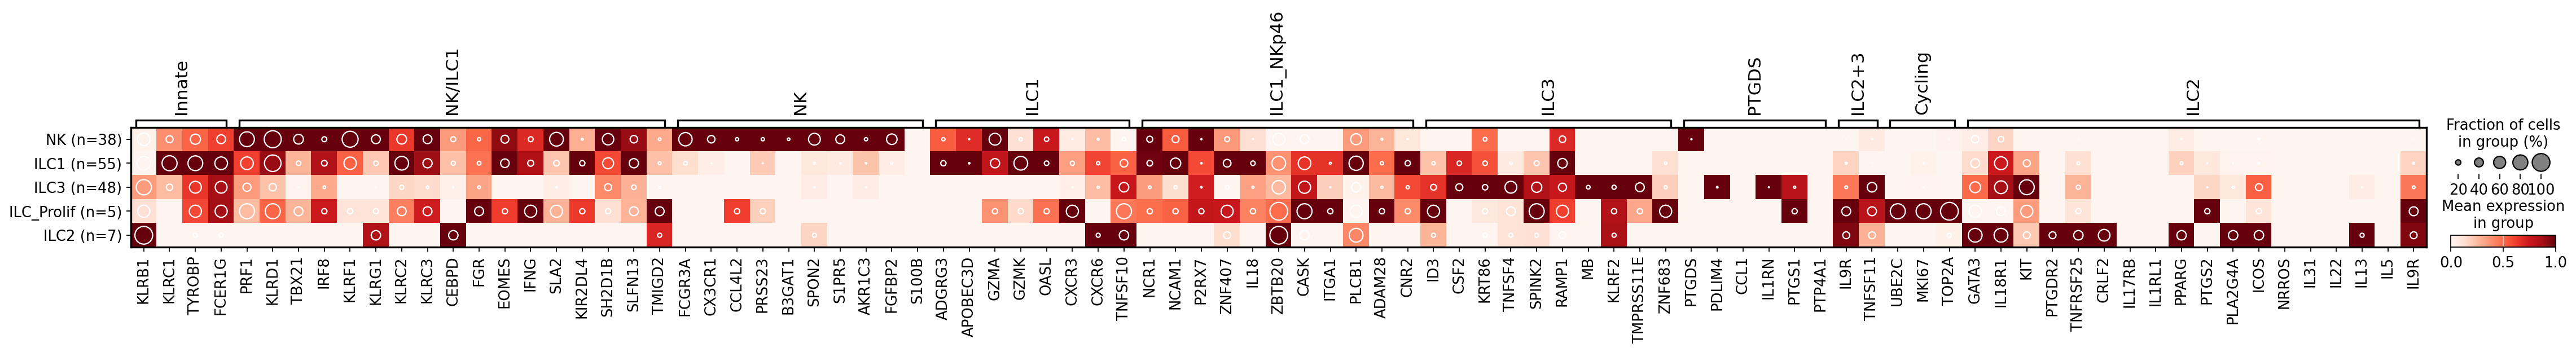

In [17]:
dp = sc.pl.DotPlot(
    adata_iiii,  
       ALLT2,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=ORDER,  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1)  

          
#dp.show()   
dp.savefig("fig6/supp_10a.pdf", dpi=300)       
    

In [18]:
ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
 # 'CMSS1',
  'LAYN',
  'CCR8',
  'NR4A1'],
 'TR1': ['EOMES',
  'IL10',
  'LAG3',
  'HAVCR2',
  'PDCD1',
  'FOXB1',
  'TNFSF9',
 # 'VCAM1'
        ],
  
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
 'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
 'Th': ['CD4', 'CD40LG', 'MCAM', ],
 'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1',
         'XYLT1', 'GNAQ',  'ZEB2', # 'PTGS2', 'MMP7',
        "ZHX2",'CCR6', 'BACH2', "CXCR6",
               ],
         #"CD8": ["CD8A"],
        
                
 'CD8A+ cytotoxic T cells': [ 'GZMA', 'GZMK', 'CCL4','NKG7', 'CCL5',  ],
           'Tc0': ['DONSON', 'GPR15', 'CD8B2', 'IL9R', 
                     #"AGAP1", "C12orf42", "GML", "CCR5",
                     ],

         'IFNG': ["KLRG1",'IFNG', 'TNFSF9', 'CCL3'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'TRM_IL13': ['IL22', 'IL13', 'NBAS',# 'CCL17',
         'AREG', 'IL9R', 'PDLIM4', 'CCR8',
         'ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
 'TRM_IL17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',  'LRRN3',
  'MYO7A',
  'IL21',],
    'Mixed': [

  'CTSH',
  'VDR',
  'CCR6',
  'IL26'
         ],
 'Other': ['PTPN13', #'ITGA1'
          ],
 'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
 #'Memory': ['CD69'],
 'Gamma-delta': ['FXYD2',
  'TRGC2',
  'TRDV1',
  'TRGV4',
  'EMP1',
  'NSG1',
  'MPZL2',
  'XCL1',
  'KLRC2',
  'KLRC3',
  'KLRD1',
  'TRDC',
  'VSTM2L',
  'LAT2',
  'SPINT2',
  'KRT86',
  'FCER1G',
  'TRDV1',
  'SPRY2'],
 'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
     'TYROBP',],
 #'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
                 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
 # 'ILC2_inflammatory': ['CRLF2',
 #  'IL17RB',
 #  'IL1RL1',
 #  'IL18R1',
 #  'PLA2G4A',
 #  'IL4',
 #  'IL31',
 #  'ICOS',
 #  'NRROS'],

        }
 
 

In [20]:
# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata.var_names]
#     return LIST

# remove_markers(ALL_T)


In [21]:
ALL_T={'Conventional': ['CD4', 'CD8A'],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32', 'IL1R1', 'CCR8', 'NR4A1'],
 'TR1': ['EOMES', 'IL10', 'LAG3', 'HAVCR2', 'PDCD1', 'FOXB1', 'TNFSF9'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2'],
 'GIMAPs': ['GIMAP4', 'GIMAP5'],
 'Th': ['CD4', 'CD40LG', 'MCAM'],
 'Th_PPARGhi': ['PPARG', 'SPAG1', 'GNAQ', 'ZEB2', 'CCR6', 'BACH2', 'CXCR6'],
 'CD8A+ cytotoxic T cells': ['GZMA', 'GZMK'],
 'Tc0': ['IL9R'],
 'IFNG': ['KLRG1', 'IFNG', 'TNFSF9'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'TRM_IL13': ['IL22', 'IL13', 'IL9R', 'PDLIM4', 'CCR8', 'ZBTB16'],
 'TRM_IL17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',
  'IL21'],
 'Mixed': ['CTSH', 'VDR', 'CCR6', 'IL26'],
 'Other': ['PTPN13'],
 'ITGA1hi': ['ITGA1', 'KLRG1'],
 'Gamma-delta': ['EMP1', 'KLRC2', 'KLRD1', 'TRDC', 'VSTM2L', 'SPRY2'],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A']}

In [25]:
ORDER=[ 'Treg (n=443)',
 'Treg_LRRC32+ (n=1116)',
    
 'Tnaive (n=1321)',
 'Th (n=2422)',
 'Th_PPARGhi (n=2181)',
 'Tc0 (n=292)',
 'Tc1 (n=9)',
 'Tc2 (n=1181)',
 'Tc3_IFNGhi (n=417)',
          'TRM_IL13+ (n=5)',
 'TRM_IL17+ (n=12)',
        'T_γδ (n=213)',
 'T_Prolif (n=81)',

]

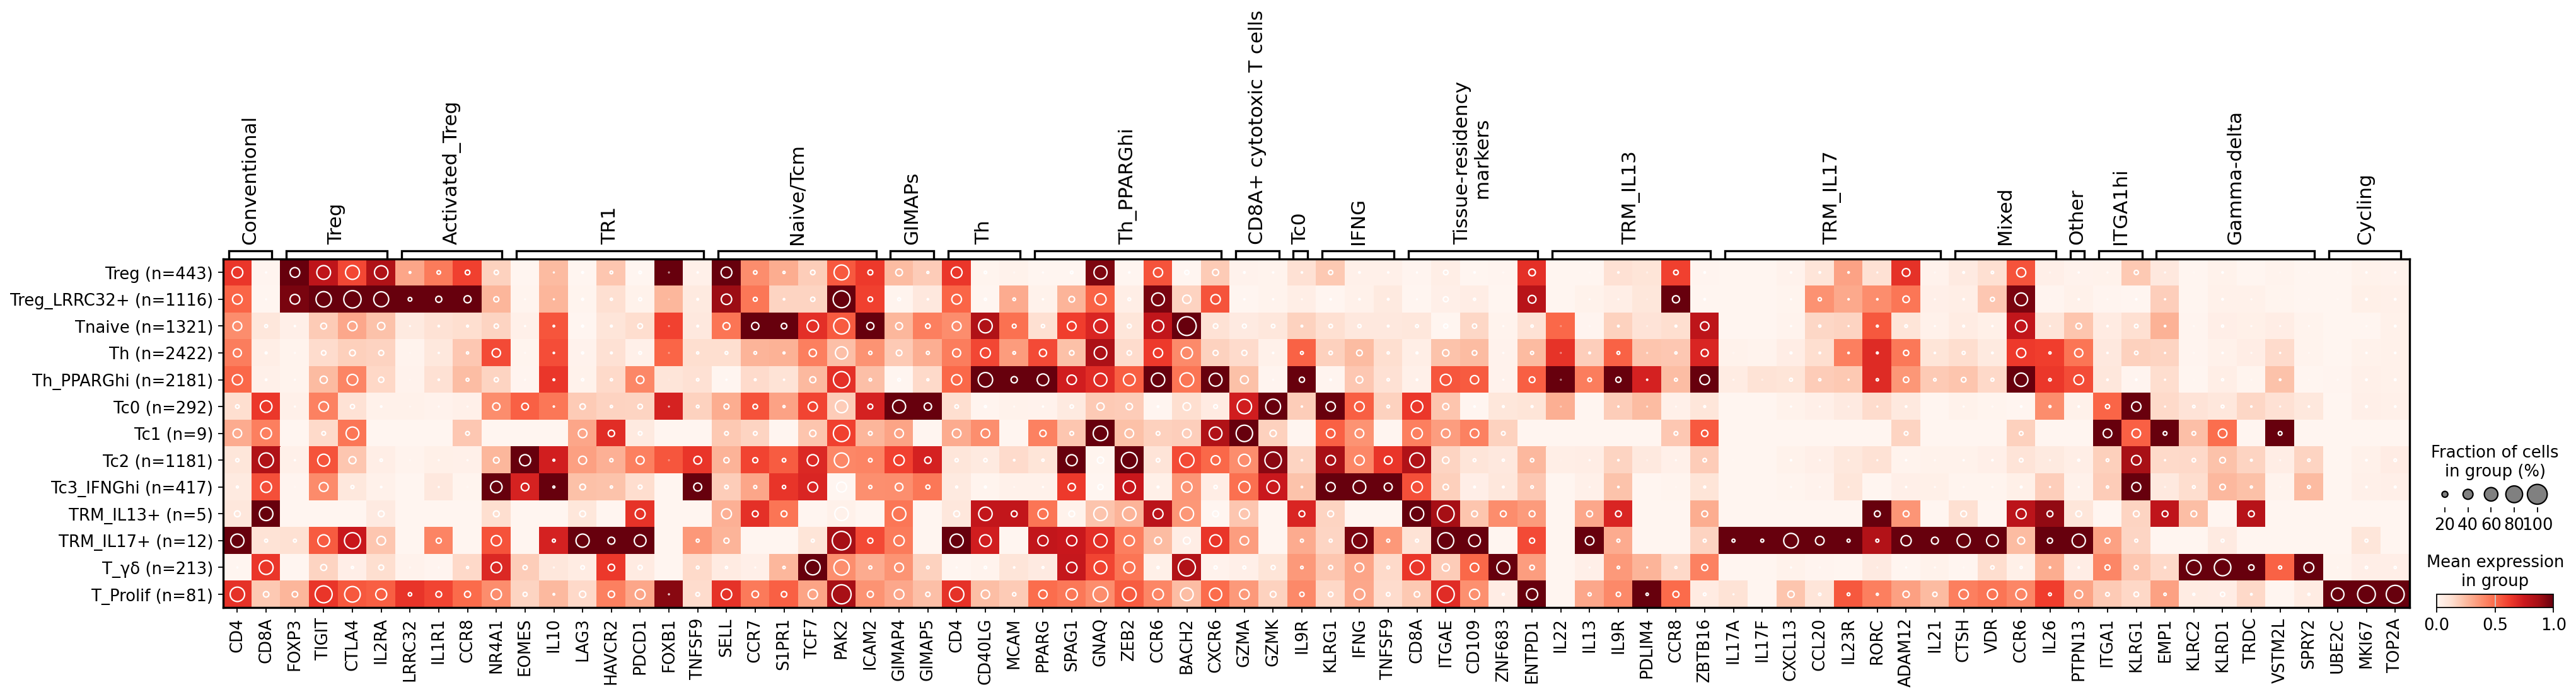

In [26]:
adata_iiii = adata_ii[~adata_ii.obs["provisional"].str.startswith("ILC")]   
    
counts = adata_iiii.obs[CATEGORY].value_counts()
valid_statuses = counts[counts >= 1].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs[CATEGORY].isin(valid_statuses)].copy()
# Step 1: Count cells per group
counts = adata_iiii.obs[CATEGORY].value_counts()
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs[CATEGORY].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]

#ORDER=['NK (n=38)', 'ILC1 (n=55)', 'ILC3 (n=48)', 'ILC_Prolif (n=5)', 'ILC2 (n=7)']

sc.pl.DotPlot(
    adata_iiii,  
       ALL_T,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
       categories_order=ORDER,  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1,   

          )\
.show()



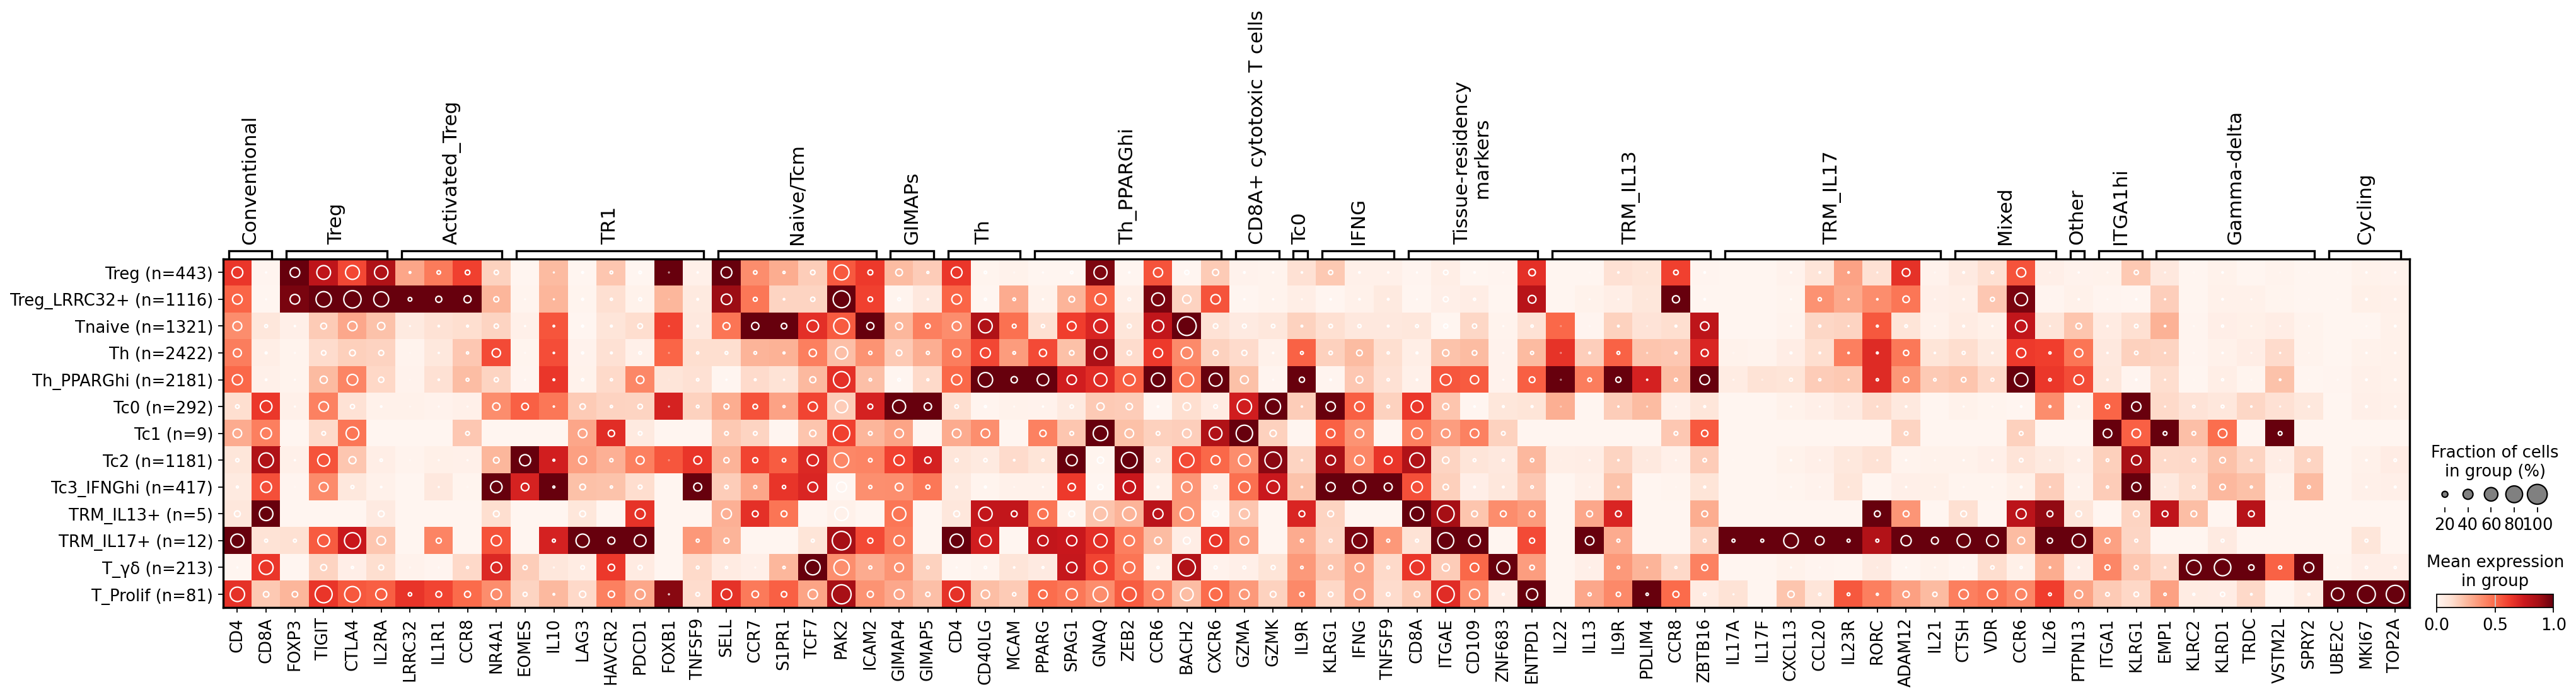

In [28]:
dp = sc.pl.DotPlot(
    adata_iiii,  
       ALL_T,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=ORDER,  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1)  

          
#dp.show()   
dp.savefig("fig6/supp_10a_T.pdf", dpi=300)       
    

In [ ]:
# STOP

In [ ]:
adata_iiii[adata_iiii.obs["provisional"].str.startswith("ILC")].obs["Patient_status_labeled"].unique()

# Sebaceous gland

In [ ]:
import os
import scanpy as sc
BASE = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/'
os.listdir(BASE)

In [ ]:
adata_ii=sc.read_h5ad(BASE + 'adata_kcappendage_nonan.h5ad')
adata_ii

In [ ]:
adata_ii.obs["Mapping_status2"].value_counts()

In [ ]:
# sc.pl.umap(
#     adata_ii,
#         color=[
#          "provisional_names"
#     ],
#     legend_loc="on data",
#     s=10,
#         legend_fontsize=6,
#         legend_fontoutline=2,
#         edgecolor='black',
#         linewidth=.1,
#         #save="6b_sebaceous.pdf"

#     #legend_fontsize=10)
#     ) 



In [ ]:
# adata_i=sc.read_h5ad(BASE + 'adata_kcappendage_nonan_sebocytesonly.h5ad')
# adata_i

In [ ]:
# sc.pl.umap(
#     adata_i,
#         color=[
#         'provisional4', "provisional_celltypes"
#     ],
#     legend_loc="on data",
#     s=10,
#         legend_fontsize=6,
#         legend_fontoutline=2,
#         edgecolor='black',
#         linewidth=.1,
#         #save="6b_sebaceous.pdf"

#     #legend_fontsize=10)
#     ) 



In [ ]:
# import scanpy as sc
# adata=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_all_scvi5.h5ad')


In [ ]:
# adata.write('/nfs/team298/ls34/adult_skin/final_adatas/adata_sebaceous.h5ad')


In [ ]:
# import scanpy as sc
# adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_sebaceous.h5ad')


In [ ]:
# adata

In [ ]:
# adata.write('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_all_scvi5.h5ad')


In [ ]:

# md = adata_t.obs["scanvi_predictions"].to_dict()
# adata.obs["scanvi_predictions"] = adata.obs.index.map(md)
# adata.obs["scanvi_predictions"].value_counts()

In [ ]:
# adata_acne = adata[adata.obs["Mapping_status2"]!="Atlas"]
# adata_acne.obs["scanvi_predictions"].value_counts()

In [ ]:
# #adata_i.write("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage.h5ad")

# adata_i=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan.h5ad")
# #     #'/nfs/team298/ls34/new_disease_atlas/model_scanvi5_ALL_6409/adata_all_scvi5.h5ad.countsonlyleiden')


In [ ]:
# #adata_i.write("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage.h5ad")

# adata_i=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan.h5ad")
# #     #'/nfs/team298/ls34/new_disease_atlas/model_scanvi5_ALL_6409/adata_all_scvi5.h5ad.countsonlyleiden')


In [ ]:
# import scvi
# import scanpy as sc

# # Setup the AnnData object — scANVI expects the same setup as training
# # Set the same keys used during training — typically 'batch' and 'labels'
# # Replace with actual keys if different
# adata_i.obs["batch"] = "unknown"  # or however your batches are defined
# adata_i.obs["labels"] = "unknown"  # dummy placeholder, scANVI requires it

# # # Register AnnData for scANVI
# # scvi.model.SCANVI.setup_anndata(
# #     adata_i,
# #     batch_key="batch",       # must match training
# #     labels_key="labels"      # even dummy; required for model input shape
# # )

# # Load trained scANVI model
# model = scvi.model.SCANVI.load(
#     '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/',
#     #adata=adata_i
# )



In [ ]:
# adata_t = sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata.h5ad')
# adata_t

In [ ]:
# # Get predictions — these are label strings
# preds = model.predict(adata_t)

# adata_t.obs["scanvi_predictions"] = preds
# adata_t.obs["scanvi_predictions"].value_counts()

In [ ]:
# adata_i.X[:15,:15].A

In [ ]:
adata_i=adata_ii

In [ ]:
colors={'Adipocyte': '#B8860B',
 'F1: Superficial': '#FFFFE4',
 'F1: Regenerative': '#FFFFE4',

'F2/3: Perivascular': '#78b5d7',
 'F2: Universal': '#d0e1f2',
 'F3: FRC-like': '#fbd4d7',
 'F4: DS_DPEP1+': '#d3eec9',
 'F4: TNN+COCH+': '#80ca80',
        'F4: DP_HHIP+': "#26a83f",
         "F4: HF-associated": "#26a83f",
 'F5: NGFR+': '#788bd2',
 'F5: RAMP1+': '#9e99c9',
 'F6: Inflammatory myofibroblast': '#00ffff',
 'KC1/2': '#505aa1',
 'KC2/3_cycling': '#007FFF',
        "KC_cycling":  '#007FFF',
 'KC3': '#839edd',
 'KC4': '#b1dae6',
 'KC5': '#272c5f',
 'KC_HF: Basal': '#006400',
         'KC_HF: m': '#abe8bd',
"KC_HF: HS": '#abe8bd',
        
 'KC_HF: IRS+HS': '#abe8bd',
        # 'KC_HF: IRS': '#abe8bd',
          "KC_SebocyteGland_Outer": "#fe5e00",
          "KC_SebocyteGland_Inner": "#ffff33",
        "KC_SebocyteDuct_Outer/HF_Junction": "#5C430F", #"#000000",
        "KC_SebocyteDuct_Outer": "#958159",
        "KC_SebocyteDuct_Inner": "#f6d7b0",
   "KC_HF: ORS0": "#003200",
       "KC_HF: ORS1": "#9ad295", 
        "KC_HF: ORS1/2": "#9ad295", 
        "KC_HF: ORS2": "#e7f9e5",
         'KC_HF: IRS': "#ff083a",
        "KC_HF: IRS_cycling": "#FF849D",
        

# Sweat gland channel inner
# ILC1/NK
# Tnaive
# VE4_Cap_APLN+

        
 'KC: HF ORS1/2': '#94cb72',
        "KC_HF: IRS+HS_medulla": "#94cb72",
        "KC_HF: IRS_TCHH+": "#990523",
 'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
 'KCinflamm_basal/int': '#f4e9ef',
 'KCinflamm_late': '#D49BB1',
 'LC': '#63D7F0',
# 'LC_CCR7+': '#5F3D7D',
 'LC_SLC18A2+': '#3bc1d9',
 'LE': '#FFFF00',
 'Mac': '#845DAE',
         'Mac2': '#845DAE',

 'Mac2_CCL14hi': '#4F2F6D',
 'Mast cell':  "#f8ac59",#'#FF1493',
 'Melanocyte': '#6f3a3a',
 'MigDC': '#00FF00',
        'MigDC (cDC2)': '#00FF00',
        'MigDC (cDC1)':  "#FF073A", #'#00FF00',
 'Smooth muscle': '#f371af',
 'Nonspecific': '#D3D3D3',
 'Pericyte1': '#F7A3C3',
 'Pericyte2_VSMC': '#D04A8A',
 'Plasma cell': '#ff5e00',
 'KC_Sebocyte_basal': '#e28743',
 'KC_Sebocyte_inner': '#ffd1a3',
         "KC_Sebocyte": '#ffd1a3',
 'Sweat gland': '#00CCCC',
 'Sweat gland channel': '#2DA8A0',
 'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
         'Sweat gland channel inner': "#FFE5B4",#'#D1F9F6',
# 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
        'Sweat gland channel outer': "#B3FFF0",
                "Sweat gland Myoepithelial":  "#f275ae",

   'T': '#F4D1A1',
    'T_Prolif': '#D4B082',
    'Tc': '#8C6A3B',
        
"Tc1":  '#8C6A3B',
        'Tc2': '#8C6A3B',
"Tc_IL9R+GPR15hi": '#5a1f16',
         

         
    'Tnaive': '#F9F2E4',
            'Tnaive1': '#F9F2E4',
            'Tnaive2': '#FCF8F2',

    'Treg': '#B2CBA4',
    'Treg_LRRC32+': "#68984c",#'#7E5F43',
 'VE2': '#9f1a1a',
         'VE': '#9f1a1a',

 'VE1_Art': '#660000',
 'VE3_Ven': '#764869',
        'VE4_Cap': '#FFB6C1',
        "VE3_Ven_APLN+": "#FF073A",
        
 'cDC1':"#ac1d5c", #'#9B70C1',
 'cDC2': '#6F478C',
  'cDC2: MMP12hi': "#f71886", #'#7D56A3',
 'mSchwann': '#A9A9A9',
 'nmSchwann': '#0A0A0A',
 'pDC': '#D85B8C',
        'cDC2: EREG+CCR7+': "#7B8B43",
      




        
        
        
        
### scrna only
        'TransitionalDC': "#9b4ef5",
'Bcell': "#e14d00",
'Cartilage': "#404040", 
'F4: DP_HHIP+': "#26a83f",
         "F4: HF-associated": "#26a83f",
'F6: Inflammatory myofibroblast': "#00ffff",
'F_Fascia': "#000000",
'ILC1':  "#FF0000",#3"#ffef59",#"#4a7948", #'#3D6B35',
        "ILC1_NCR2+P2RX7+": "#c7eeb1",#"#FFFF80",
'ILC1_NK': "#F4D03F",
        "ILC1/NK": "#F4D03F",
'ILC2':  "#364f99", #"#334ead", #"#F1C40F",
        'ILC2/3': "#F1C40F",

'ILC3': "#FFE1F0",
        "ILC3 CCL1+PTGDS+":  "#ff69b4", # "#8C6900",
        "ILC3_CCL1+PTGDS+":  "#ff69b4", # "#c75190",
        'ILC_Prolif':"#7f3462",
        "ILC_prolif": "#7f3462",
'KC1': "#3a4e7a",
'KC2': "#505aa1",
'KC_HF: ORS_cycling': "#00b300",
'KC_HF: Basal_NPNT+': "#006400",
         "KC_HF": "#006400",
'KCinflamm_basal': "#f9f3fb",
        'KCinflamm': "#f9f3fb",
        "KCinflamm_int/late":  "#e9c8dc",

'KCinflamm_cycling':"#e0c5d2",
        "KC1-2_cycling": "#e0c5d2",
'KCinflamm_int': "#f5d3e7",
'LC_CCR7+': "#3bc1a4",
'Mac1': "#6A3F9B",
'Mac_CX3CR1+': "#9D1A80",
        "Mac_TREM2+LPL+":  "#D2C5E1",
'Merkel cell': "#2f2f2f",
'MoDC': "#7F00A2",
"MoDC/cDC2: MMP12+": "#7F00A2",
"MoDC/cDC2": "#7F00A2",
        
'Monocyte': "#D8A7FF",
'Mono CD16+': "#E1C6FF",
'NK': "#FFEB3B",
'Neutrophil': "#4D3F8C",
'Satellite cell': "#F387C7",
'Skeletal muscle': "#F14D8E",
'Tc_IFNGhi': "#F5A600",
        "Tc3_IFNGhi":  "#F5A600",
        "Tc_GPR15hi": "#FCE4B3",
            'TRM_IL13+': '#F87A7B',
        #f98c8d
'TRM_IL17+': "#E63238", #"#B25E1F",#F87A7B',#"#A75C3E",
'Tc_ZNF683+': "#D4B082",
        "T_γδ": "#D4B082",
'Th': "#F4D1A1",
        "Th_PPARGhi": "#FAE064",
                "Th_PPARGhi_IL17+": "#FD7032",

        
        "Th_CXCR6+": "#F48B50",
'TR1': '#E3F2DC',
'cDC2: IL1B+': "#B78FE1",
        "cDC2_cycling": "#9272B4",
       "Eosinophil": "#FF5F00",
        
    "Mechanoreceptor ASIC2+": "#D3D3D3",
        
   
  "KC_HF/Sebocyte_Junction/inner duct": "#00F7F7", # "#8B4513",  # brown   (saddle-brown)
    "KC_HF: ORS2/IRS":                     "#FF0000",  # peach   (pale peach)
        "KC_HF: ORS2i":                     "#FF0000",  # peach   (pale peach)

    "KC_HF: ORS1? ?bulb/infundibulum":     "#87CEEB",  # neon yellow
    'KC_HF: ORS-?bulb/infundibulum': "#87CEEB",  
    "KC_HF: ORS0 (lowq)":                  "#4D4D4D",  # dark grey

    "KC_HF: ORS0":          "#006400",
    "KC_HF: ORS1":          "#66C266",
    "KC_HF: ORS2":          "#FFDDC1",
    "KC_HF: ORS_cycling":   "#000000",
    "KC_HF: IRS":           "#0000FF",
    "KC_HF: IRS0":          "#FFA500",
    "KC_HF: IRS1":          "#FFFF00",
    "KC_HF: IRS2":          "#FF69B4",      # "#008000",
    "KC_HF: IRS_cycling":   "#00F5FF",
    "KC_HF: HS Xenium":     "#0000FF",
    "KC_HF: HS":            "#e6ecf0",
 "KC_HF: HS scRNA":      "#FF69B4",
    'KC_SebocyteDuct_Outer':   "#FF69B4",
    #e6ecf0
      "KC_HF: ORS_junction2inner": "#32CD32",
    "KC_HF: ORS_junction":       "#39FF14",
    "KC_HF: ORS cycling(new)":   "#1A1A1A",
    "KC_HF: HFSC":               "#D600FF",
    "KC_HF: ORS-Bulb/infundibulum": "#F3FFF3",  #"#F3CCD7",
    "KC_HF: IRS_Cuticle":        "#D8B7FF",
    
    "KC_Sebocyte_DuctOuter":                 "#000000",  # black
    "KC_Sebocyte_DuctInner":                 "#C8A165",  # light brown
    "KC_Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
    "KC_Sebocyte_GlandInner":                "#FFFFCC",  # yellow
    "KC_Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
    'KC_Sebocyte_DuctInner_Junction':   "#FF69B4", 
   'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
    "KC_SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
    "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
    "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
        "Other":                "#F3F3F3",

            
    "Sebocyte_DuctOuter":                 "#000000",  # black
    "Sebocyte_DuctInner":                 "#C8A165",  # light brown
    "Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
    "Sebocyte_GlandInner":                "#FFFFCC",  # yellow
    "Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
    'Sebocyte_DuctInner_Junction':   "#FF69B4", 
            'Sebocyte_DuctInnerJunction':   "#FF69B4", 

   'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
    #"SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
    "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
    "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
        "Other":                "#F3F3F3",

       }

import pickle
COLOR_PICKLE_PATH= '/nfs/team298/ls34/color_for_adult_skin2.pkl'
# # Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
# # adata.obs['lvl5_annotation'] =adata.obs['lvl5_annotation'] .astype('category')
# # adata.uns['lvl5_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
# #                                      for cat in adata.obs['lvl5_annotation'].cat.categories]
# # CELL_ANNOTATION='lvl5_annotation'

colors = colors | {  "Sebocyte_DuctOuter":                 "#000000",  # black
    "Sebocyte_DuctInner":                 "#C8A165",  # light brown
    "Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
    "Sebocyte_GlandInner":                "#FFFFCC",  # yellow
    "Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
    'Sebocyte_DuctInner_Junction':   "#FF69B4", 
            'Sebocyte_DuctInnerJunction':   "#FF69B4", 

   'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
    #"SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
    "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
    "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
                  }

RENAME = {"Myoepithelial":    "Sweat gland Myoepithelial",
         "KC_HF: HS":     "KC_HF: HS", 
         "KC_HF: IRS_cuticle":  "KC_HF: IRS_Cuticle",
          "Sebocyte_cycling": "Sebocyte_DuctOuter"
         }
try:
    adata_i.obs['provisional_names']  = adata_i.obs['provisional_names'].map(RENAME).fillna(adata_i.obs['provisional_names'] )
    RENAME = {
     'KC_HF: IRS_cycling': 'KC_HF: Matrix',
     'KC_HF: ORS-Bulb/infundibulum': 'KC_HF: SPON2+',
     }
    adata_i.obs["provisional_names"]= adata_i.obs["provisional_names"].map(RENAME).fillna(adata_i.obs["provisional_names"])

    adata_i.obs['provisional_names'] =adata_i.obs['provisional_names'] .astype('category')
    adata_i.uns['provisional_names_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                         for cat in adata_i.obs['provisional_names'].cat.categories]

    #ƒ
    #sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))

    sc.pl.umap(
    adata_i,
        color=[
        'provisional_names',
    ],
    legend_loc="on data",
    s=10,
        legend_fontsize=6,
        legend_fontoutline=2,
        edgecolor='black',
        linewidth=.1,
            save="6b_AA.pdf"

    #legend_fontsize=10)
    ) 
except:
    adata_i.obs['provisional_names'] = adata_i.obs['provisional_celltypes'] 
    adata_i.obs['provisional_names']  = adata_i.obs['provisional_names'].map(RENAME).fillna(adata_i.obs['provisional_names'] )
 
    adata_i.obs['provisional_names'] =adata_i.obs['provisional_names'] .astype('category')
    adata_i.uns['provisional_names_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                         for cat in adata_i.obs['provisional_names'].cat.categories]

   # sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))

    sc.pl.umap(
    adata_i,
        color=[
        'provisional_names',
    ],
    legend_loc="on data",
    s=10,
        legend_fontsize=6,
        legend_fontoutline=2,
        edgecolor='black',
        linewidth=.1,
        #save="6b_sebaceous.pdf"

    #legend_fontsize=10)
    ) 



In [ ]:
sc.pl.umap(
adata_i,
    color=[
    'provisional_names',
],
#legend_loc="on data",
s=10,
    legend_fontsize=6,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1
#legend_fontsize=10)
) 



In [ ]:
sc.pl.umap(
    adata_i[adata_i.obs["Mapping_status2"]!="Atlas"],
    color=[
    'provisional_names',
],
#legend_loc="on data",
s=100,
    legend_fontsize=6,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    title=""
#legend_fontsize=10)
) 


In [ ]:
adata_iiii=adata_i[adata_i.obs["Mapping_status2"]!="Atlas"]
sc.pl.umap(
    adata_iiii,
    color=[
    'provisional_names',
],
legend_loc="on data",
s=20,
    legend_fontsize=6,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    #  save="5b_acne_legend.pdf"
#legend_fontsize=10)
) 
sc.pl.umap(
    adata_iiii,
    color=[
    'provisional_names',
],
#legend_loc="on data",
s=20,
    legend_fontsize=6,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    save="5b_acne.pdf"
#legend_fontsize=10)
) 


In [ ]:
CATEGORY="provisional_names"
counts = adata_iiii.obs[CATEGORY].value_counts()
valid_statuses = counts[counts >= 1].index

# Step 3: Filter the AnnData object
adata_iiii = adata_iiii[adata_iiii.obs[CATEGORY].isin(valid_statuses)].copy()
# Step 1: Count cells per group
counts = adata_iiii.obs[CATEGORY].value_counts()
label_map = {group: f"{group} (n={count})" for group, count in counts.items()}

# Step 3: Add a new column with updated labels
adata_iiii.obs["Patient_status_labeled"] = adata_iiii.obs[CATEGORY].map(label_map)

# Step 4: Sort by counts descending
sorted_labels = [label_map[g] for g in counts.index]
sorted(sorted_labels)
#ORDER=['NK (n=38)', 'ILC1 (n=55)', 'ILC3 (n=48)', 'ILC_Prolif (n=5)', 'ILC2 (n=7)']


In [ ]:
ORDER= ['KC_HF: HFSC (n=1)',
         'KC_HF: SPON2+ (n=2)',
 'KC_HF: ORS0 (n=39)',
 'KC_HF: ORS1 (n=8)',
 'KC_HF: ORS2 (n=8)',
 'KC_HF: ORS_junction (n=23)',
 'KC_HF: IRS0 (n=14)',
 'KC_HF: IRS_Cuticle (n=3)',
         'KC_HF: HS (n=2)',
 'KC_HF: Matrix (n=1)',

 'Sebocyte_DuctOuter (n=123)',
         'Sebocyte_DuctInner (n=285)',
 'Sebocyte_DuctInnerJunction (n=419)',
 'Sebocyte_GlandBasal (n=102)',
 'Sebocyte_GlandInner (n=10)',


 'Sweat gland channel outer (n=88)',
        'Sweat gland channel inner (n=43)',
         'Sweat gland (n=2)',
 'Sweat gland Myoepithelial (n=11)',
       ]

In [ ]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.nohealthy'
adata=sc.read_h5ad(PATH)
adata=adata[adata.obs["tech"]=="xenium"].copy()
import gc
gc.collect()

In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

In [ ]:
sebocyte_markers={         "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
 'Sebocyte': [ "GATA6",  "EMB",   'MGST1', "AR", "MAOB",
                 #"FST", "ANGPTL2",  
                ],
 'KC_Basal': ['COL17A1',    "TINAGL1",  "DLK2",  "CDH22" , "PTN", "DLL1",  'CDH22', "LGR6", ],
 #   "KRT9": ["KRT9"],
 #'KC2': ['BNC1', 'NOP14'],
#  #'KC_Int': ['MYCL', 'ALOX12', "CDSN",],
#  'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#          ],
#  'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
#      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        
    
#  # 'DiseaseKC': ['S100A8',
 #  'S100A9',
 #  'KRT6A',
 #  'KRT6B',
 #  'KRT6C',
 #  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
 #              # "STAT1", 'STAT2', 'IRF7',
 #               "CGAS", 
 #              ],

 

   
         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
            "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", "LRG1", "ACACB", "PC", 
                             "MAOA", "FADS1", "PM20D1",'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "PDZK1",  "DMBX1",
                              "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
                            "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
    

 #"Gland": [ ],
#     "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
#    # "Merkel": ["ATOH1", "KRT20"],
#   #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
#     "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
    
#     "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
#                       "IFI6",  "IFI44",
#                 "MX1", #"NMI", 
#                       "XAF1", "IFI44L", "LTB4R2",
#                "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
#                ] ,
}

In [ ]:
ADATA_S= adata_iiii[adata_iiii.obs["Patient_status_labeled"].str.startswith("Sebo")]
dp = sc.pl.DotPlot(
    ADATA_S,  
       sebocyte_markers,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=[x for x in ORDER if x in ADATA_S.obs["Patient_status_labeled"].unique()],  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # cataegories_order=["Treg", "Treg_LRRC32+", "TR1"]
)
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1)  

          
dp.show()   
dp.savefig("fig6/supp_10b_sebo.pdf", dpi=300)       
    

In [ ]:
hf_markers={
#  'KC1-2': ['COL17A1',  ],
#  #   "KRT9": ["KRT9"],
#  # #'KC2': ['BNC1', 'NOP14'],
#  # 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
#  # 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#  #         ],
#  # 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
         
    

   
#             "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
#          "KC_HF": ["LHX2", "RARRES2", "KRT15",],

         
     'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6",'IL31RA',
                             "COMP", "MEST", "RAI14", "AEBP1", "OLFML3", "LTBP2", "ACTA2"
                             ],
    
        "SPON2":  [  'INHBA', "SPON2", "IGFBP5", "WNT5B", "DIO2", "F2R", "BAALC","NPY1R",#"EDIL3", 
                  'WNT5B', 'FOXI3', 'FBN3', 'MBOAT1'
                   
                  
                  ],
        'KC_HF: ORS0': [ "CD200", 'NPNT',  "GREM1", ],
    
                "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
                                 'FBLN2',
                                 #"WIF1"
                                ],


            
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
   #      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        "Junction": ["SLC15A1", "SCNN1A", #"GATA6",
                     "SLCO2B1", "TYMP", "GPT"],

#      'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH',  "DLX2",
#                  'MSI1',
                 

#   #'SOX11',
#                  ],
    
    'KC_HF: IRS0':    ["SHH", "TGFA", "GDA", "HPGD", "SMOX",
        "GSDMC", 
      "CDA"],
      'KC_HF: IRS1':    [ "FLRT3", "NT5E", "GPR37", "ABCA4", "CRNN",
  'MYCN',],


     
    "Cuticle":[
        "KCNN4",  "PADI2", "B3GAT1", "IL6R", 
        "SERPINA3", "KLK6", "TRPV1", "SLAMF7",
       "IL37", "CALB2", "GABRP",
        # "TGFA", "GDA", "HPGD", "SMOX",
      #  "GSDMC", 
      #  "POU5F1", "CDA"
    ],
      "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23",
          "RETREG1", "F12", "VSNL1",# "GNAI1", "REEP6","PARM1", "CD200",
           "HOXC13", "LEF1",
          ],
 

#     'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#                  "FST", "ANGPTL2",],


#  'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#           'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],

 #"Gland": [ ],
  #  "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               

}
 

In [ ]:
ADATA_S= adata_iiii[adata_iiii.obs["Patient_status_labeled"].str.startswith("KC_HF")]
dp = sc.pl.DotPlot(
    ADATA_S,  
       hf_markers,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=[x for x in ORDER if x in ADATA_S.obs["Patient_status_labeled"].unique()],  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # cataegories_order=["Treg", "Treg_LRRC32+", "TR1"]
)
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1)  

          
dp.show()   
dp.savefig("fig6/supp_10b_hf.pdf", dpi=300)       
    

In [ ]:
sweat_markers={     'Channel': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  ['COL17A1', "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",'KRT7', 'KRT19','DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "PIGR"], 
    
                               
 'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
          'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2",  "MRGPRX3"],
    

 #"Gland": [ ],
    #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}
hf_markers={
#  'KC1-2': ['COL17A1',  ],
#  #   "KRT9": ["KRT9"],
#  # #'KC2': ['BNC1', 'NOP14'],
#  # 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
#  # 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#  #         ],
#  # 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
         
    

   
#             "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
#          "KC_HF": ["LHX2", "RARRES2", "KRT15",],

         
     'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6",'IL31RA',
                             "COMP", "MEST", "RAI14", "AEBP1", "OLFML3", "LTBP2", "ACTA2"
                             ],
    
        "SPON2":  [  'INHBA', "SPON2", "IGFBP5", "WNT5B", "DIO2", "F2R", "BAALC","NPY1R",#"EDIL3", 
                  'WNT5B', 'FOXI3', 'FBN3', 'MBOAT1'
                   
                  
                  ],
        'KC_HF: ORS0': [ "CD200", 'NPNT',  "GREM1", ],
    
                "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
                                 'FBLN2',
                                 #"WIF1"
                                ],


            
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
   #      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        "Junction": ["SLC15A1", "SCNN1A", #"GATA6",
                     "SLCO2B1", "TYMP", "GPT"],

#      'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH',  "DLX2",
#                  'MSI1',
                 

#   #'SOX11',
#                  ],
    
    'KC_HF: IRS0':    ["SHH", "TGFA", "GDA", "HPGD", "SMOX",
        "GSDMC", 
      "CDA"],
      'KC_HF: IRS1':    [ "FLRT3", "NT5E", "GPR37", "ABCA4", "CRNN",
  'MYCN',],


     
    "Cuticle":[
        "KCNN4",  "PADI2", "B3GAT1", "IL6R", 
        "SERPINA3", "KLK6", "TRPV1", "SLAMF7",
       "IL37", "CALB2", "GABRP",
        # "TGFA", "GDA", "HPGD", "SMOX",
      #  "GSDMC", 
      #  "POU5F1", "CDA"
    ],
      "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23",
          "RETREG1", "F12", "VSNL1",# "GNAI1", "REEP6","PARM1", "CD200",
           "HOXC13", "LEF1",
          ],
 

#     'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#                  "FST", "ANGPTL2",],


#  'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#           'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],

 #"Gland": [ ],
  #  "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               

}


In [ ]:
ADATA_S= adata_iiii[adata_iiii.obs["Patient_status_labeled"].str.startswith("Sw")]

dp = sc.pl.DotPlot(
    ADATA_S,  
       sweat_markers,
    #swap_axes=True,
    groupby="Patient_status_labeled",
 #  vmax=.8,
    
        categories_order=[x for x in ORDER if x in ADATA_S.obs["Patient_status_labeled"].unique()],  # <<— force your order here

 
    #    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
   # cataegories_order=["Treg", "Treg_LRRC32+", "TR1"]
)
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
               dot_max=1)  

          
dp.show()   
dp.savefig("fig6/supp_10b_sweat.pdf", dpi=300)       
    

In [ ]:
0

In [ ]:
adata_iiii = adata_i[adata_i.obs["test3"].isin(["2", "5", "9" ])]

In [ ]:
# os.listdir('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_ALL_6409/')

In [ ]:
adata_iiii

In [ ]:
genes = {#'KC3': ['PTHLH', "MAOB", "FCGBP", "CD4", "CD207"],
     'Cycling': ['TOP2A', "PBK", 'MKI67',],
     "KC_HF": ["LHX2", "RARRES2", "GLI1"],
 
 'KC_HF: HFSC': ['ANGPTL7', "EPHB2", "LOXL2", "CA9", "COL11A1", "CD34","COMP", "THBS2", "LTBP2",
                ],
     'KC_HF: ORS-Bulb/infundibulum': ['SPON2', "TSPAN12", "DIO2",  ],
 'KC_HF: ORS0': ['ENPP1', "GREM1"],
# 'KC_HF: ORS1': ['ADGRB1'],
        'KC_HF: ORS1-2': ['PARM1', "SERPINA3", "S100A1", "VSIR" ],
 'KC_HF: ORS2': [  "EPHB2", 'CBLN2',  'ADGRB1', "CXCL12",'VTCN1','SMOC1', "GRP", ],
        'KC_HF: ORS_junction': ["CALB2",],

     'KC_HF: IRS0': ["KRT85", "KRT25",'LEF1', 'MYCN', ],
 'KC_HF: IRS1': ['KCNK2', "CRNN", "GPR37", "FZD10", "PADI3", "TCHH"],
 'KC_HF: IRS_Cuticle': ['CDSN',"KRT23", "LRRC15", "IL6R", "KCNN4", "AQP5", "HMOX1", "PADI2", "CST4", "IL37", "TGM6",
                        "CAPN8", "TRPV3", "FGF22",  ],
# 'KC_HF: IRS_Sebo_doublet?': [ "NRP2"],
           "KC_HF: HS": ["KRT35", "LY6G6D", "KRT32", "KRT31", "TESC",
                         'CPA6', 'HOXC13', "RIDA", "SH3BGRL2", "CACNA1C" ,"FERMT3",
                         "WNT10A"],

 # 'KC_Sebocyte_DuctInner': ['CDHR1',],
 # 'KC_Sebocyte_DuctInner_Junction': ['SERPINB4', "TGM1", "TMEM45A"],
 # 'KC_Sebocyte_DuctOuter': ['LMO1', "IL20"],
 # 'KC_Sebocyte_GlandBasal': ['NNAT', "COL23A1"],
 # 'KC_Sebocyte_GlandInner': ['MUC1', "PLA2R1", "PLA2G7", "OAS1",
 #                           "PDZK1", "ROS1", "CD36", "ENTPD1", 
 #                            "RORC", "HSD3B1", "DMBX1", "FAM107A", "CYP4F2"
 #                           ],

 
        
        }

sc.pl.dotplot(
    adata_iiii,
    genes,
    groupby="provisional_names",
    standard_scale="var",
    dendrogram=False,
    #categories_order=[x for x in ORDER_HF if x in adata_iiii.obs["provisional"].unique()]
    #swap_axes=True
) 


In [ ]:
import scanpy as sc
# adata_ii=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_ALL_6409/adata_all_scvi5.h5ad.countsonlyleiden.sebocytesonly')
# adata_ii
adata_ii=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan_sebocytesonly.h5ad")


In [ ]:
adata_ii = adata_ii[adata_ii.obs["provisional3"]!="kunk or inner"]
sc.pl.umap(
adata_ii[adata_ii.obs["Mapping_status2"]!="Atlas"],
color=[
    'provisional3', 
],
legend_loc="on data",
s=200,
#legend_fontsize=10)
) 


In [ ]:
adata_iii = adata_ii[
    (adata_ii.obs["Patient_status"] == "Acne") #| 
   # (adata_ii.obs["Site_status"] == "Lesional")
].copy()

In [ ]:
sc.pp.neighbors(adata_iii, n_neighbors=20, use_rep="X_scvi")
print("neighbors calculated")

sc.tl.umap(adata_iii, min_dist=0.3)


In [ ]:
sc.tl.paga(adata_iii, groups="provisional3")#  neighbors_key="n_20")
    


#sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(3,3))
sc.pl.paga(adata_iii, plot=True) 
#sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(20,20))


In [ ]:
#sc.pl.paga(adata_iii, plot=F, threshold=0.1) 

sc.tl.umap(adata_iii, init_pos='paga',   min_dist=0.5,
         # neighbors_key = f"n_{N_NEIGHBORS}"
          )
      
           #labels="test13") 
        

In [ ]:
colors={'Adipocyte': '#B8860B',
 'F1: Superficial': '#FFFFE4',
 'F1: Regenerative': '#FFFFE4',

'F2/3: Perivascular': '#78b5d7',
 'F2: Universal': '#d0e1f2',
 'F3: FRC-like': '#fbd4d7',
 'F4: DS_DPEP1+': '#d3eec9',
 'F4: TNN+COCH+': '#80ca80',
        'F4: DP_HHIP+': "#26a83f",
         "F4: HF-associated": "#26a83f",
 'F5: NGFR+': '#788bd2',
 'F5: RAMP1+': '#9e99c9',
 'F6: Inflammatory myofibroblast': '#00ffff',
 'KC1/2': '#505aa1',
 'KC2/3_cycling': '#007FFF',
        "KC_cycling":  '#007FFF',
 'KC3': '#839edd',
 'KC4': '#b1dae6',
 'KC5': '#272c5f',
 'KC_HF: Basal': '#006400',
         'KC_HF: m': '#abe8bd',
"KC_HF: HS": '#abe8bd',
        
 'KC_HF: IRS+HS': '#abe8bd',
        # 'KC_HF: IRS': '#abe8bd',
          "KC_SebocyteGland_Outer": "#fe5e00",
          "KC_SebocyteGland_Inner": "#ffff33",
        "KC_SebocyteDuct_Outer/HF_Junction": "#5C430F", #"#000000",
        "KC_SebocyteDuct_Outer": "#958159",
        "KC_SebocyteDuct_Inner": "#f6d7b0",
   "KC_HF: ORS0": "#003200",
       "KC_HF: ORS1": "#9ad295", 
        "KC_HF: ORS1/2": "#9ad295", 
        "KC_HF: ORS2": "#e7f9e5",
         'KC_HF: IRS': "#ff083a",
        "KC_HF: IRS_cycling": "#FF849D",
        

# Sweat gland channel inner
# ILC1/NK
# Tnaive
# VE4_Cap_APLN+

        
 'KC: HF ORS1/2': '#94cb72',
        "KC_HF: IRS+HS_medulla": "#94cb72",
        "KC_HF: IRS_TCHH+": "#990523",
 'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
 'KCinflamm_basal/int': '#f4e9ef',
 'KCinflamm_late': '#D49BB1',
 'LC': '#63D7F0',
# 'LC_CCR7+': '#5F3D7D',
 'LC_SLC18A2+': '#3bc1d9',
 'LE': '#FFFF00',
 'Mac': '#845DAE',
         'Mac2': '#845DAE',

 'Mac2_CCL14hi': '#4F2F6D',
 'Mast cell':  "#f8ac59",#'#FF1493',
 'Melanocyte': '#6f3a3a',
 'MigDC': '#00FF00',
        'MigDC (cDC2)': '#00FF00',
        'MigDC (cDC1)':  "#FF073A", #'#00FF00',
 'Smooth muscle': '#f371af',
 'Nonspecific': '#D3D3D3',
 'Pericyte1': '#F7A3C3',
 'Pericyte2_VSMC': '#D04A8A',
 'Plasma cell': '#ff5e00',
 'KC_Sebocyte_basal': '#e28743',
 'KC_Sebocyte_inner': '#ffd1a3',
         "KC_Sebocyte": '#ffd1a3',
 'Sweat gland': '#00CCCC',
 'Sweat gland channel': '#2DA8A0',
 'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
         'Sweat gland channel inner': "#FFE5B4",#'#D1F9F6',
# 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
        'Sweat gland channel outer': "#B3FFF0",
                "Sweat gland Myoepithelial":  "#f275ae",

   'T': '#F4D1A1',
    'T_Prolif': '#D4B082',
    'Tc': '#8C6A3B',
        
"Tc1":  '#8C6A3B',
        'Tc2': '#8C6A3B',
"Tc_IL9R+GPR15hi": '#5a1f16',
         

         
    'Tnaive': '#F9F2E4',
            'Tnaive1': '#F9F2E4',
            'Tnaive2': '#FCF8F2',

    'Treg': '#B2CBA4',
    'Treg_LRRC32+': "#68984c",#'#7E5F43',
 'VE2': '#9f1a1a',
         'VE': '#9f1a1a',

 'VE1_Art': '#660000',
 'VE3_Ven': '#764869',
        'VE4_Cap': '#FFB6C1',
        "VE3_Ven_APLN+": "#FF073A",
        
 'cDC1':"#ac1d5c", #'#9B70C1',
 'cDC2': '#6F478C',
  'cDC2: MMP12hi': "#f71886", #'#7D56A3',
 'mSchwann': '#A9A9A9',
 'nmSchwann': '#0A0A0A',
 'pDC': '#D85B8C',
        'cDC2: EREG+CCR7+': "#7B8B43",
      




        
        
        
        
### scrna only
        'TransitionalDC': "#9b4ef5",
'Bcell': "#e14d00",
'Cartilage': "#404040", 
'F4: DP_HHIP+': "#26a83f",
         "F4: HF-associated": "#26a83f",
'F6: Inflammatory myofibroblast': "#00ffff",
'F_Fascia': "#000000",
'ILC1':  "#FF0000",#3"#ffef59",#"#4a7948", #'#3D6B35',
        "ILC1_NCR2+P2RX7+": "#c7eeb1",#"#FFFF80",
'ILC1_NK': "#F4D03F",
        "ILC1/NK": "#F4D03F",
'ILC2':  "#364f99", #"#334ead", #"#F1C40F",
        'ILC2/3': "#F1C40F",

'ILC3': "#FFE1F0",
        "ILC3 CCL1+PTGDS+":  "#ff69b4", # "#8C6900",
        "ILC3_CCL1+PTGDS+":  "#ff69b4", # "#c75190",
        'ILC_Prolif':"#7f3462",
        "ILC_prolif": "#7f3462",
'KC1': "#3a4e7a",
'KC2': "#505aa1",
'KC_HF: ORS_cycling': "#00b300",
'KC_HF: Basal_NPNT+': "#006400",
         "KC_HF": "#006400",
'KCinflamm_basal': "#f9f3fb",
        'KCinflamm': "#f9f3fb",
        "KCinflamm_int/late":  "#e9c8dc",

'KCinflamm_cycling':"#e0c5d2",
        "KC1-2_cycling": "#e0c5d2",
'KCinflamm_int': "#f5d3e7",
'LC_CCR7+': "#3bc1a4",
'Mac1': "#6A3F9B",
'Mac_CX3CR1+': "#9D1A80",
        "Mac_TREM2+LPL+":  "#D2C5E1",
'Merkel cell': "#2f2f2f",
'MoDC': "#7F00A2",
"MoDC/cDC2: MMP12+": "#7F00A2",
"MoDC/cDC2": "#7F00A2",
        
'Monocyte': "#D8A7FF",
'Mono CD16+': "#E1C6FF",
'NK': "#FFEB3B",
'Neutrophil': "#4D3F8C",
'Satellite cell': "#F387C7",
'Skeletal muscle': "#F14D8E",
'Tc_IFNGhi': "#F5A600",
        "Tc3_IFNGhi":  "#F5A600",
        "Tc_GPR15hi": "#FCE4B3",
            'TRM_IL13+': '#F87A7B',
        #f98c8d
'TRM_IL17+': "#E63238", #"#B25E1F",#F87A7B',#"#A75C3E",
'Tc_ZNF683+': "#D4B082",
        "T_γδ": "#D4B082",
'Th': "#F4D1A1",
        "Th_PPARGhi": "#FAE064",
                "Th_PPARGhi_IL17+": "#FD7032",

        
        "Th_CXCR6+": "#F48B50",
'TR1': '#E3F2DC',
'cDC2: IL1B+': "#B78FE1",
        "cDC2_cycling": "#9272B4",
       "Eosinophil": "#FF5F00",
        
    "Mechanoreceptor ASIC2+": "#D3D3D3",
        
   
  "KC_HF/Sebocyte_Junction/inner duct": "#00F7F7", # "#8B4513",  # brown   (saddle-brown)
    "KC_HF: ORS2/IRS":                     "#FF0000",  # peach   (pale peach)
        "KC_HF: ORS2i":                     "#FF0000",  # peach   (pale peach)

    "KC_HF: ORS1? ?bulb/infundibulum":     "#87CEEB",  # neon yellow
    'KC_HF: ORS-?bulb/infundibulum': "#87CEEB",  
    "KC_HF: ORS0 (lowq)":                  "#4D4D4D",  # dark grey

    "KC_HF: ORS0":          "#006400",
    "KC_HF: ORS1":          "#66C266",
    "KC_HF: ORS2":          "#FFDDC1",
    "KC_HF: ORS_cycling":   "#000000",
    "KC_HF: IRS":           "#0000FF",
    "KC_HF: IRS0":          "#FFA500",
    "KC_HF: IRS1":          "#FFFF00",
    "KC_HF: IRS2":          "#FF69B4",      # "#008000",
    "KC_HF: IRS_cycling":   "#00F5FF",
    "KC_HF: HS Xenium":     "#0000FF",
    "KC_HF: HS":            "#e6ecf0",
 "KC_HF: HS scRNA":      "#FF69B4",
    'KC_SebocyteDuct_Outer':   "#FF69B4",
    #e6ecf0
      "KC_HF: ORS_junction2inner": "#32CD32",
    "KC_HF: ORS_junction":       "#39FF14",
    "KC_HF: ORS cycling(new)":   "#1A1A1A",
    "KC_HF: HFSC":               "#D600FF",
    "KC_HF: ORS-Bulb/infundibulum": "#F3FFF3",  #"#F3CCD7",
    "KC_HF: IRS_Cuticle":        "#D8B7FF",
    
    "KC_Sebocyte_DuctOuter":                 "#000000",  # black
    "KC_Sebocyte_DuctInner":                 "#C8A165",  # light brown
    "KC_Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
    "KC_Sebocyte_GlandInner":                "#FFFFCC",  # yellow
    "KC_Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
    'KC_Sebocyte_DuctInner_Junction':   "#FF69B4", 
   'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
    "KC_SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
    "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
    "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
        "Other":                "#F3F3F3",

            
    "Sebocyte_DuctOuter":                 "#000000",  # black
    "Sebocyte_DuctInner":                 "#C8A165",  # light brown
    "Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
    "Sebocyte_GlandInner":                "#FFFFCC",  # yellow
    "Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
    'Sebocyte_DuctInner_Junction':   "#FF69B4", 
            'Sebocyte_DuctInnerJunction':   "#FF69B4", 

   'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
    #"SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
    "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
    "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
    
        "Other":                "#F3F3F3",

       }





# # sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))
# # sc.pl.umap(
# #     adata,
# #     color=[ "lvl5_annotation"],
# #     show=True,
# #     frameon=False,
# #     legend_loc= "on data",
# #     legend_fontsize=8,
# #     s=10,
# #     title='',
# #     legend_fontoutline=2,
# #   save="1b_scrna2.pdf"
# # )
# sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor="white", frameon=False, figsize=(21,21))
# # sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))

# # sc.pl.umap(
# #     adata,
# #     color=[ "lvl4_annotation"],
# #     show=True,
# #     frameon=False,
# #     legend_loc= "on data",
# #     legend_fontsize=12,
# #     s=10,
# #     title='',
# #     legend_fontoutline=2,
# #   save="1b_scrna.pdf"
# # )

# import pickle
# file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# # Save the dictionary} to the file
# with open(file_path, 'wb') as file:
#     pickle.dump(colors, file)

RENAME = {"Myoepithelial":    "Sweat gland Myoepithelial",
         "KC_HF: HS":     "KC_HF: HS", 
         "KC_HF: IRS_cuticle":  "KC_HF: IRS_Cuticle",
          "Sebocyte_cycling": "Sebocyte_DuctOuter"
         }
adata_iii.obs['provisional3'] =adata_iii.obs['provisional3'].map(RENAME).fillna(adata_iii.obs['provisional3'])

adata_iii.obs['provisional3'] =adata_iii.obs['provisional3'] .astype('category')
adata_iii.uns['provisional3_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_iii.obs['provisional3'].cat.categories]

In [ ]:


#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))

sc.pl.umap(
adata_iii,
    color=[
    'provisional3',
],
legend_loc="on data",
s=280,
    legend_fontsize=10,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1
#legend_fontsize=10)
) 


In [ ]:
#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))

sc.pl.umap(
adata_iii,
    color=[
    'provisional3',
],
#legend_loc="on data",
s=280,
    legend_fontsize=10,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1
#legend_fontsize=10)
) 


In [ ]:
# adata_iii.write("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan_sebocytesonly2.h5ad")


In [ ]:
# adata_ii.write("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan_sebocytesonly.h5ad")


In [ ]:
GWAS_GENES =  [
    "ADAMTS18", "ALG12", "ANKRD55", "BCL11A", "BCL11B", "BORCS5", "C8orf48",
    "CSTA", "CRELD2", "DBX1", "DLG1", "EDAR", "EDNRA", "ERRFI1", "FCHO2",
    "FGF10", "FGF2", "FST", "IL1B", "IL36RN", "INAVA", "LAMC1", "LAMC2",
    "LGR6", "LYPLAL1", "MAP3K11", "MYEOV", "OVOL1", "PARD6G", "PCNX3",
    "PDLIM4", "PIM3", "PNPLA3", "PPP1R12B", "PRAG1", "PRDM1", "RASSF10",
    "SEMA4B", "SHB", "SLC22A4", "SLC22A5", "SOAT1", "SOX7", "SPPL2A",
    "SPRY1", "SPRY2", "SUGCT", "TBX18", "TGFB2", "TIMP3", "TIMP4", "WNT10A",
    
        'FADS2', 'LGR5','FASN', 'ZNRF3', 'KREMEN1'

]


sc.pl.dotplot(
    adata_iii,
    GWAS_GENES,
    groupby="provisional3",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 


In [ ]:
# import numpy as np

# # Define the condition: whether 'provisional3' starts with any of your prefixes
# condition = adata.obs["lvl4_annotation"].str.startswith(("Sebo", "Sweat", "KC_HF", "KC_Seb"))

# # Create the new column based on the condition
# adata.obs["gwas"] = np.where(
#     condition,
#     adata.obs["lvl4_annotation"],
#     adata.obs["lvl0"]
# )

In [ ]:
# sc.pl.dotplot(
#     adata,
#     GWAS_GENES,
#     groupby="lvl4_annotation",
#     standard_scale="var",
#     dendrogram=False,
#     cmap="Reds",
    
#         # categories_order=ORDER,

#     #vmax=1,
# #     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
# #  'KC_Sebocyte_PPARG+_basal/outer',
# #  'KC_Sebocyte_PPARG+_basal_cycling',
# # ]
# ) 


In [ ]:
# SPECIFIC_GWAS_GENES = ["C8orf48" , "MYEOV", "SOAT1" , 
#                       "PNPLA3" , "FASN" , "FADS2" ,
#                        "LYPLAL1", "LGR6", "FST", 
#                       ]


In [ ]:
0

In [ ]:
adata[adata.obs["gwas"]=="KC_Appendage"].obs.lvl4_annotation.value_counts()

In [ ]:
import numpy as np

# Define the condition: whether 'provisional3' starts with any of your prefixes
condition = adata.obs["lvl4_annotation"].str.startswith(("Sebo", "Sweat", "KC_HF", "KC_Sebo", "F6",))

# Create the new column based on the condition
adata.obs["gwas"] = np.where(
    condition,
    adata.obs["lvl4_annotation"],
    adata.obs["lvl0"]
)

In [ ]:


sc.pl.dotplot(
    adata,
    SPECIFIC_GWAS_GENES,
    groupby="gwas",
    standard_scale="var",
    dendrogram=False,swap_axes=True
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 




sc.pl.dotplot(
    adata,
    SPECIFIC_GWAS_GENES,
    groupby="gwas",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sc.pl.dotplot(
    adata[adata.obs["Patient_status"]=="Acne"],
    SPECIFIC_GWAS_GENES,
    groupby="scanvi_predictions",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sc.pp.normalize_total(adata_hf_acne, target_sum=1e4)
sc.pp.log1p(adata_hf_acne)

In [ ]:
SPECIFIC_GWAS_GENES = ['SOAT1', 'PNPLA3', 'FASN', 'FADS2', 'LGR6', 'FST',
"MYEOV", 
                       "LYPLAL1", 
    "C8orf48" , 
                      ]
sc.pl.dotplot(
    adata_hf_acne,
    SPECIFIC_GWAS_GENES,
    groupby="provisional_names",
    standard_scale="var",
    dendrogram=False,
    swap_axes=True
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sc.pl.dotplot(
    adata_hf_acne,
    SPECIFIC_GWAS_GENES,
    groupby="provisional_names",
    standard_scale="var",
    dendrogram=False,
    swap_axes=True
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



sc.pl.dotplot(
    adata_hf_acne,
    SPECIFIC_GWAS_GENES,
    groupby="provisional_names",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sc.pl.dotplot(
    adata,
    SPECIFIC_GWAS_GENES,
    groupby="gwas",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sc.pl.dotplot(
    adata,
    GWAS_GENES,
    groupby="gwas",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 



In [ ]:
sorted(adata_i.obs["provisional_names"].unique())

In [ ]:
ORDER_HF = ['KC_HF: HFSC',

 'KC_HF: ORS-Bulb/infundibulum',
 'KC_HF: ORS0',
 'KC_HF: ORS1',
 'KC_HF: ORS2',
 'KC_HF: ORS_junction',
            
             'KC_HF: IRS_cycling',

             'KC_HF: IRS0',
 'KC_HF: IRS1',
 'KC_HF: IRS_Cuticle',
             'KC_HF: HS',
             'Sebocyte_cycling',
 'Sebocyte_DuctOuter',
 'Sebocyte_DuctInner',
 'Sebocyte_DuctInnerJunction',
 'Sebocyte_GlandBasal',
 'Sebocyte_GlandInner',

 'Sweat gland channel inner',
 'Sweat gland channel outer',
            'Sweat gland',
 'Sweat gland Myoepithelial',]

In [ ]:
GWAS_GENES =  [
    "ADAMTS18", "ALG12", "ANKRD55", "BCL11A", "BCL11B", "BORCS5", "C8orf48",
    "CSTA", "CRELD2", "DBX1", "DLG1", "EDAR", "EDNRA", "ERRFI1", "FCHO2",
    "FGF10", "FGF2", "FST", "IL1B", "IL36RN", "INAVA", "LAMC1", "LAMC2",
    "LGR6", "LYPLAL1", "MAP3K11", "MYEOV", "OVOL1", "PARD6G", "PCNX3",
    "PDLIM4", "PIM3", "PNPLA3", "PPP1R12B", "PRAG1", "PRDM1", "RASSF10",
    "SEMA4B", "SHB", "SLC22A4", "SLC22A5", "SOAT1", "SOX7", "SPPL2A",
    "SPRY1", "SPRY2", "SUGCT", "TBX18", "TGFB2", "TIMP3", "TIMP4", "WNT10A",
    
    
    'FADS2', 'LGR5','FASN', 'ZNRF3', 'KREMEN1'
]

adata_hf_acne = adata_i[adata_i.obs["Mapping_status2"]!="Atlas"] 
sc.pl.dotplot(
    adata_hf_acne,
    GWAS_GENES,
    groupby="provisional_names",
    standard_scale="var",
    dendrogram=False,
        categories_order=[x for x in ORDER_HF if x in adata_hf_acne.obs["provisional_names"].unique()],

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 


In [ ]:
# kc_markers={     "KC_HF": ["LHX2", "RARRES2",],

#              'KC_HF: Basal': [ "CD200", 'NPNT','LGR5', 'GLI2', #"CNTN6", "GREM1", 'IL31RA'
#                              ],
#  'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
#         # "KC6": ['SMPD3', 'CTSH',  "AQP9" ],

#  'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
#                  "SHH",  'MSI1',
#   'MYCN',

#   #'SOX11',
#                  ],
#        "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
#     "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

#     # 'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#     #              "FST", "ANGPTL2",],


#  'Sebocyte': [ "GATA6",  "EMB",  'MGST1', "AR",
#                  #"FST", "ANGPTL2",  
#                 ],
#  'Basal': ['COL17A1',    "TINAGL1",  "DLK2", # "CDH22" ,
#            "PTN", "DLL1" , "LGR6"],

#          'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
#                  #"VCAM1", "IRF1", "ITGB1", 
#                                    ],
    
#      'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
#                                 "SERPINB4", "LIPG", "CCDC61",  ],
#              "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
#                 # "LGALSL",
#                   "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
#                   "SH3BGRL2",
#                  "MYO5B"],
# # 'KC_Sebocyte_duct_outer_cycling': [''],
#  #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
#             "PPARG+": [ 'PPARG',  "PPARA", 'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
#                       "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3", "EMB"
#                        #"LRG1", "ACACB", "PC", 
#                             # "MAOA", "PM20D1",
#                       ],
#      'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
#  'KC_Sebocyte_PPARG+_inner': [  "CUX2", 
#                               "SEC14L3", 
#                               "TNNT2",
#                              "DMBX1",# "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
#                              ],
# #      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
# #                         ],
#             "Retinoic acid": ["PNPLA3", "ALDH1A1", "ALDH1A2"], 
#   #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
#     "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
#             'Channel': [ 'RUNX3', 'CCN3',# "MYLPF", #"FGF7"
#                         ],
        
#     "Channel_outer":  [#'COL17A1', 
#         "PTGFR", "ITGB2", "TG", "ADRB2"],
#             "Channel_inner": [ "CFTR",  #"CRHR1",
#                               "GPR12", 'FGFBP2', 'MAL', ],
    
#  'Sweat_gland': ["PPARGC1A",#'KRT7', 'KRT19',
#                  'DCD', #"SLC12A2",
#                  "PPP1R1B", "AQP5", "CHRM3", "ACHE"], 
    
                               
#  'LGR6+': [#'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#          # 'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3',# "CD200",
#      "FBLN2",],
            
    

#  #"Gland": [ ],
#     #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
#    # "Merkel": ["ATOH1", "KRT20"],
#   #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

# }
genes_plus_sweatsebo = {#'KC3': ['PTHLH', "MAOB", "FCGBP", "CD4", "CD207"],
     'Cycling': ['TOP2A', "PBK", 'MKI67',],
     "KC_HF": ["LHX2", "RARRES2", "GLI1"],
 
 'KC_HF: HFSC': ['ANGPTL7', "EPHB2", "LOXL2", "CA9", "COL11A1", "CD34","COMP", "THBS2", "LTBP2",
                ],
     'KC_HF: ORS-Bulb/infundibulum': ['SPON2', "TSPAN12", "DIO2",  ],
 'KC_HF: ORS0': ['ENPP1', "GREM1"],
# 'KC_HF: ORS1': ['ADGRB1'],
        'KC_HF: ORS1-2': ['PARM1', "SERPINA3", "S100A1", "VSIR" ],
 'KC_HF: ORS2': [  "EPHB2", 'CBLN2',  'ADGRB1', "CXCL12",'VTCN1','SMOC1', "GRP", ],
        'KC_HF: ORS_junction': ["CALB2",],

     'KC_HF: IRS0': ["KRT85", "KRT25",'LEF1', 'MYCN', ],
 'KC_HF: IRS1': ['KCNK2', "CRNN", "GPR37", "FZD10", "PADI3", "TCHH"],
 'KC_HF: IRS_Cuticle': ['CDSN',"KRT23", "LRRC15", "IL6R", "KCNN4", "AQP5", "HMOX1", "PADI2", "CST4", "IL37", "TGM6",
                        "CAPN8", "TRPV3", "FGF22",  ],
# 'KC_HF: IRS_Sebo_doublet?': [ "NRP2"],
           "KC_HF: HS": ["KRT35", "LY6G6D", "KRT32", "KRT31", "TESC",
                         'CPA6', 'HOXC13', "RIDA", "SH3BGRL2", "CACNA1C" ,"FERMT3",
                         "WNT10A"],

 # 'KC_Sebocyte_DuctInner': ['CDHR1',],
 # 'KC_Sebocyte_DuctInner_Junction': ['SERPINB4', "TGM1", "TMEM45A"],
 # 'KC_Sebocyte_DuctOuter': ['LMO1', "IL20"],
 # 'KC_Sebocyte_GlandBasal': ['NNAT', "COL23A1"],
 # 'KC_Sebocyte_GlandInner': ['MUC1', "PLA2R1", "PLA2G7", "OAS1",
 #                           "PDZK1", "ROS1", "CD36", "ENTPD1", 
 #                            "RORC", "HSD3B1", "DMBX1", "FAM107A", "CYP4F2"
 #                           ],

  'Sebocyte': [ "GATA6",  "EMB",  'MGST1', "AR",
                 #"FST", "ANGPTL2",  
                ],
 'Basal': ['COL17A1',    "TINAGL1",  "DLK2", # "CDH22" ,
           "PTN", "DLL1" , "LGR6"],

         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
             "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", 'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3", "EMB"
                       #"LRG1", "ACACB", "PC", 
                            # "MAOA", "PM20D1",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "CUX2", 
                              "SEC14L3", 
                              "TNNT2",
                             "DMBX1",# "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
            "Retinoic acid": ["PNPLA3", "ALDH1A1", "ALDH1A2"], 
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
    "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
            'Channel': [ 'RUNX3', 'CCN3',# "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  [#'COL17A1', 
        "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",#'KRT7', 'KRT19',
                 'DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "CHRM3", "ACHE"], 
    
                               
 'LGR6+': [#'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
         # 'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3',# "CD200",
     "FBLN2",],
            
        
        }


sc.pl.dotplot(adata_hf_acne, 
              genes_plus_sweatsebo,
              groupby="provisional_names",
              dendrogram=False, 
                standard_scale="var",
                      categories_order=[x for x in ORDER_HF if x in adata_hf_acne.obs["provisional_names"].unique()],
             dot_max=0.8,)


In [ ]:
adata_hf_acne.obs["provisional_names"].value_counts()

In [ ]:
NEW_GWAS = ['FADS2', 'LGR5','FASN', 'ZNRF3', 'KREMEN1']
                                                      
sc.pl.dotplot(
    adata_iii,
    NEW_GWAS,
    groupby="provisional3",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 


In [ ]:
stop

In [ ]:
adata=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_all_scvi5.h5ad')
adata_acne=adata[adata.obs["Mapping_status2"]!="Atlas"]

In [ ]:
#sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(18,18))

sc.pl.umap(
adata_acne,
color=[
    'scanvi_predictions', 
],
legend_loc="on data",
s=2,
legend_fontsize=10)



In [ ]:

sc.pl.dotplot(
    adata_acne,
    GWAS_GENES,
    groupby="scanvi_predictions",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 


In [ ]:

sc.pl.dotplot(
    adata_acne,
    NEW_GWAS,
    groupby="scanvi_predictions",
    standard_scale="var",
    dendrogram=False,
        # categories_order=ORDER,

    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 
